# Using satellite imagery to train a model for identifying the type of landmarks

## Sampling

Because of the memory limitations of my computer,
I cannot load the entire dataset into memory and perform operations on it.
As a result,
I will instead sample both datasets into ${20000}$ examples
before working with them.

In [ ]:
# the sampling script that I wrote
from sample_dataset import mainarg as sample_from_filename

# filenames for training and test data
data_filenames = ['dataset/X_train_sat4.csv', 'dataset/X_test_sat4.csv']

# loop through filenames
for filename in data_filenames:
    sample_from_filename(filename)
# next filename


===reading from===
dataset\X_train_sat4.csv
dataset\y_train_sat4.csv
===writing to===
dataset\X_train_sat4_samp20000.csv
dataset\y_train_sat4_samp20000.csv
===sampling from 399999 examples===
0. copying from <_io.TextIOWrapper name='dataset\\y_train_sat4.csv' mode='r' encoding='cp1252'>
1. copying from <_io.TextIOWrapper name='dataset\\X_train_sat4.csv' mode='r' encoding='cp1252'>
writing to dataset\y_train_sat4_samp20000.csv
writing to dataset\X_train_sat4_samp20000.csv

===reading from===
dataset\X_test_sat4.csv
dataset\y_test_sat4.csv
===writing to===
dataset\X_test_sat4_samp20000.csv
dataset\y_test_sat4_samp20000.csv
===sampling from 99999 examples===
0. copying from <_io.TextIOWrapper name='dataset\\y_test_sat4.csv' mode='r' encoding='cp1252'>
1. copying from <_io.TextIOWrapper name='dataset\\X_test_sat4.csv' mode='r' encoding='cp1252'>
writing to dataset\y_test_sat4_samp20000.csv
writing to dataset\X_test_sat4_samp20000.csv


## Preprocess data

Now we may work with the data.

Start by importing necessary modules
and setting up important constants.

In [ ]:
import pandas as pd                                         # for the dataframes
from math import *                                          # for ceil
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression           # for the learning models

In [ ]:
# constants
X_TRAIN_FILENAME = r'dataset/X_train_sat4_samp20000.csv'    # filename of the dataset input
Y_TRAIN_FILENAME = r'dataset/y_train_sat4_samp20000.csv'    # filename of the dataset input

Read in the files
and do a high level inspection.

In [ ]:
# read in the training data
X_train = pd.read_csv(X_TRAIN_FILENAME)
y_train = pd.read_csv(Y_TRAIN_FILENAME)

In [ ]:
# combine training data features, labels
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
# print shapes of X, y
print("X_train shape\t{}".format(X_train.shape))
print("y_train shape\t{}".format(y_train.shape))
print("combined shape\t{}".format(df_train.shape))

X_train shape	(19999, 3136)
y_train shape	(19999, 4)
combined shape	(19999, 3140)


In [ ]:
# print some basic information about the dataset
print('\n===data frame information===')
df_train.info()

# print its parameters
print('\n===data frame parameters===')
df_train.describe()


===data frame information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 3140 entries, 122 to 0.2
dtypes: int64(3140)
memory usage: 479.1 MB

===data frame parameters===


,122,136,126,197,106,115,95,180,69,68,...,77.14,165.3,96.30,103.31,94.37,179.9,0,1,0.1,0.2
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,127.778989,123.954298,110.979049,158.808990,127.609980,123.837242,110.864343,158.689084,127.610531,123.910246,...,111.153508,158.804190,128.174759,124.218011,111.201060,158.912496,0.263813,0.201560,0.178609,0.356018
std,42.826465,37.945785,35.706565,37.819509,42.947181,38.090841,35.787016,37.862464,42.863217,37.942215,...,35.980356,37.692666,42.905734,37.908342,35.641014,37.598032,0.440710,0.401175,0.383034,0.478833
min,0.000000,3.000000,1.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,99.000000,89.000000,140.000000,98.000000,99.000000,89.000000,140.000000,98.000000,99.000000,...,89.000000,140.000000,99.000000,100.000000,89.000000,140.000000,0.000000,0.000000,0.000000,0.000000
50%,124.000000,122.000000,110.000000,166.000000,123.000000,122.000000,109.000000,166.000000,123.000000,122.000000,...,110.000000,166.000000,124.000000,122.000000,110.000000,166.000000,0.000000,0.000000,0.000000,0.000000
75%,159.000000,148.000000,132.000000,185.000000,159.000000,148.000000,132.000000,185.000000,158.000000,148.000000,...,133.000000,185.000000,159.000000,148.000000,133.000000,185.000000,1.000000,0.000000,0.000000,1.000000
max,255.000000,255.000000,255.000000,253.000000,244.000000,255.000000,255.000000,252.000000,246.000000,255.000000,...,255.000000,254.000000,248.000000,251.000000,255.000000,245.000000,1.000000,1.000000,1.000000,1.000000


We can see from these summaries that all $3140$ columns, features and labels, are `int64`, and thus numerical features.

In [ ]:
# calculate the number of missing values
n_missing = df_train.isnull().sum()

# print the number missing for each column,
# but ignore 0s since there are so many columns
print(r'===# missing values per column===')
print(n_missing[n_missing != 0])

===# missing values per column===
Series([], dtype: int64)


Additionally, we find that there are no columns with missing values.
Let's inspect the distributions of each feature and the label.

===histogram of 122===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


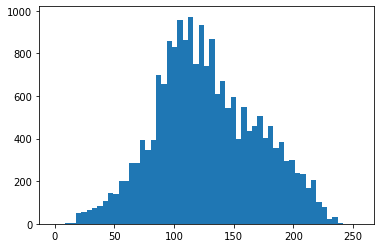


===histogram of 136===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


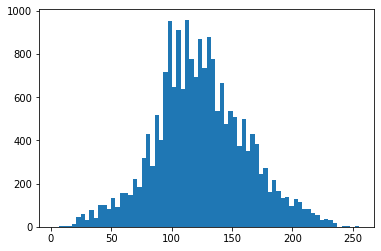


===histogram of 126===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


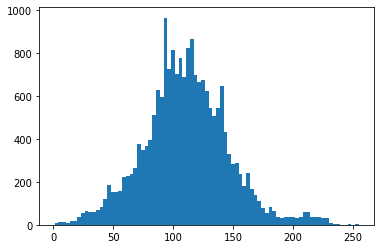


===histogram of 197===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 249
width	 3.3156836110909156
# bins	 76


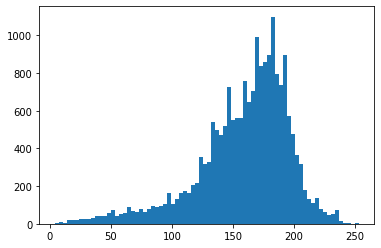


===histogram of 106===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 244
width	 4.494593339478797
# bins	 55


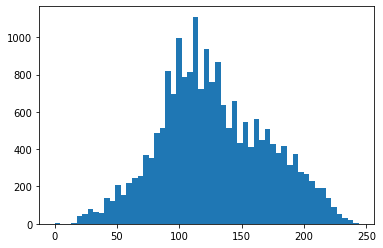


===histogram of 115===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


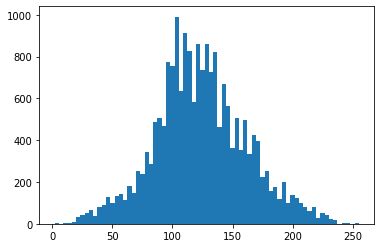


===histogram of 95===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


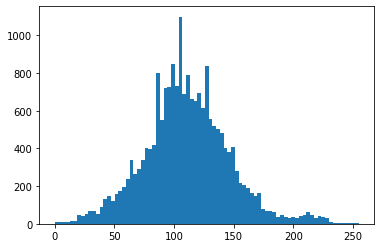


===histogram of 180===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 252
range	 252
width	 3.3156836110909156
# bins	 77


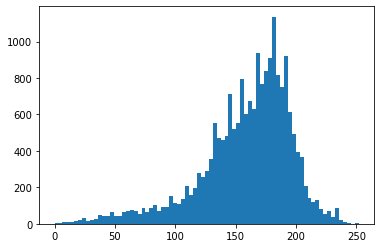


===histogram of 69===
min	 0
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 246
range	 246
width	 4.420911481454554
# bins	 56


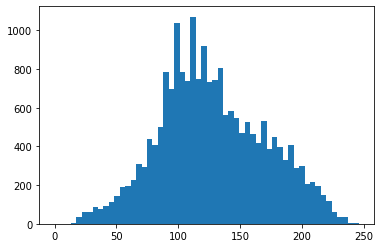


===histogram of 68===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


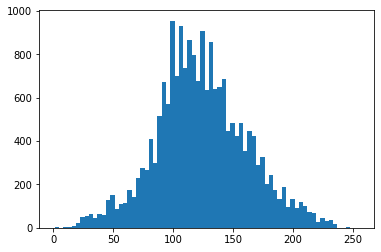


===histogram of 42===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


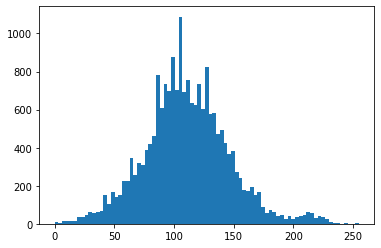


===histogram of 141===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


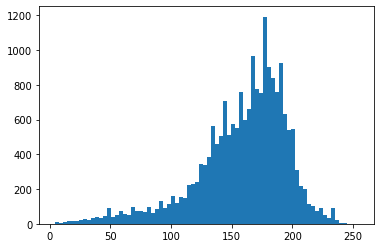


===histogram of 76===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 247
range	 246
width	 4.494593339478797
# bins	 55


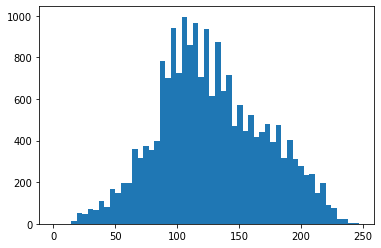


===histogram of 77===
min	 1
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 254
width	 3.5367291851636433
# bins	 72


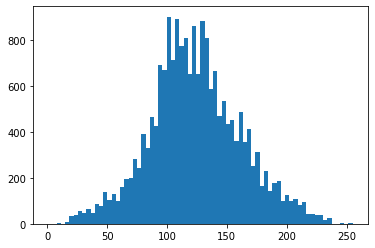


===histogram of 57===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


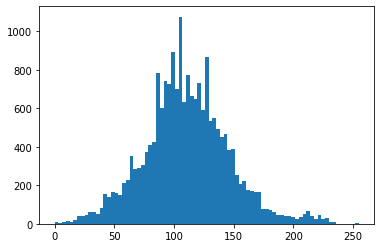


===histogram of 146===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 246
width	 3.3156836110909156
# bins	 75


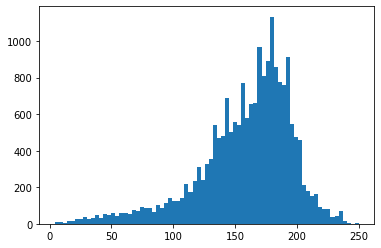


===histogram of 107===
min	 2
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 239
width	 4.420911481454554
# bins	 55


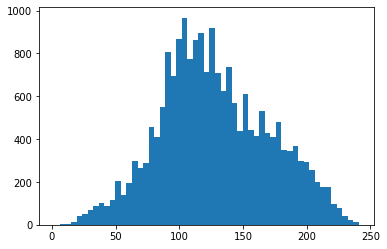


===histogram of 118===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 247
width	 3.5367291851636433
# bins	 70


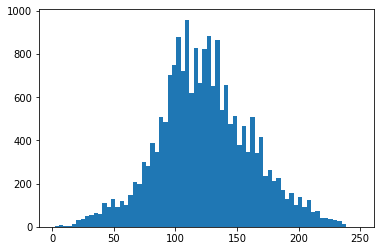


===histogram of 102===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


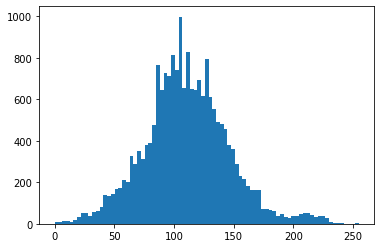


===histogram of 188===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 249
width	 3.3156836110909156
# bins	 76


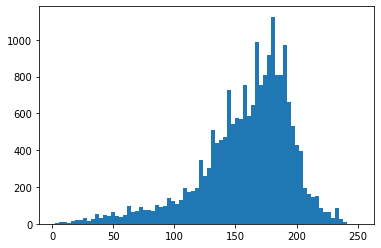


===histogram of 112===
min	 0
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 243
width	 4.420911481454554
# bins	 55


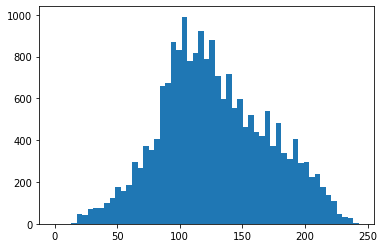


===histogram of 128===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 244
range	 242
width	 3.5367291851636433
# bins	 69


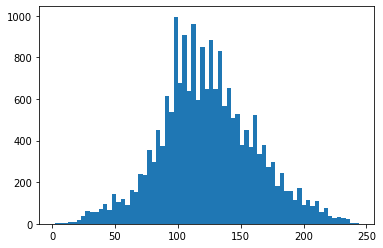


===histogram of 111===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


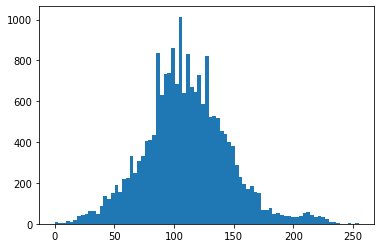


===histogram of 199===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 248
width	 3.3156836110909156
# bins	 75


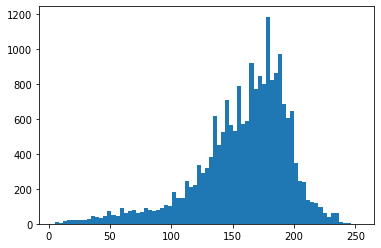


===histogram of 117===
min	 1
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 238
range	 237
width	 4.420911481454554
# bins	 54


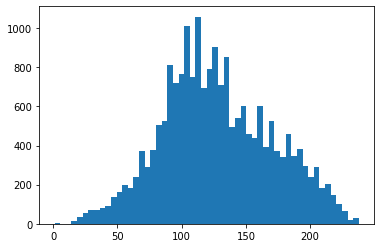


===histogram of 131===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 249
range	 247
width	 3.6104110431878857
# bins	 69


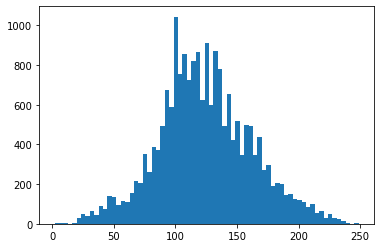


===histogram of 110===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


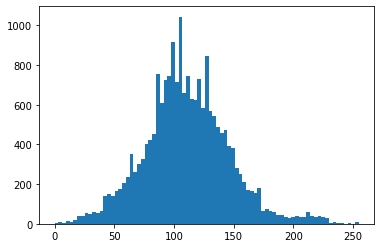


===histogram of 199.1===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 253
width	 3.3156836110909156
# bins	 77


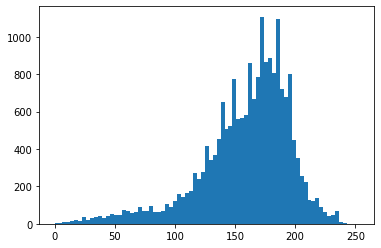


===histogram of 111.1===
min	 2
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 241
width	 4.420911481454554
# bins	 55


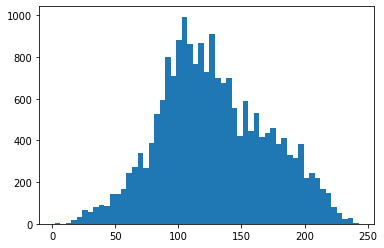


===histogram of 123===
min	 1
25.0%	 99.5
75.0%	 147.0
ibqr	 47.5
iqr	 47.5
max	 246
range	 245
width	 3.499888256151522
# bins	 71


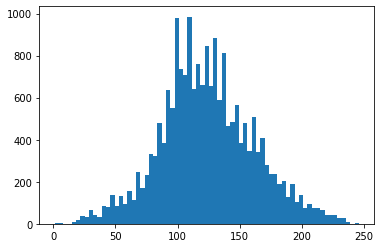


===histogram of 103===
min	 2
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 253
width	 3.1683198950424303
# bins	 80


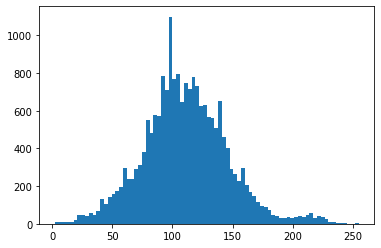


===histogram of 193===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 249
width	 3.3156836110909156
# bins	 76


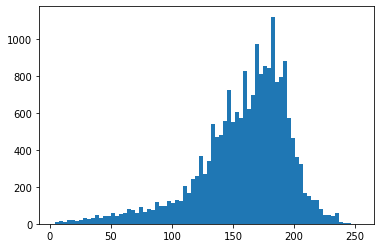


===histogram of 98===
min	 5
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 250
width	 4.420911481454554
# bins	 57


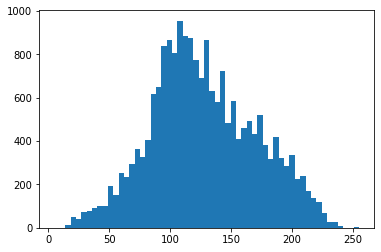


===histogram of 107.1===
min	 1
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 254
width	 3.5367291851636433
# bins	 72


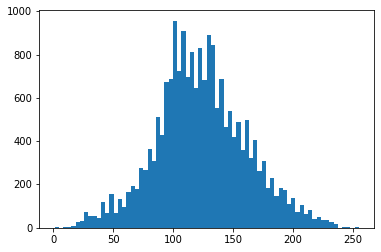


===histogram of 80===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


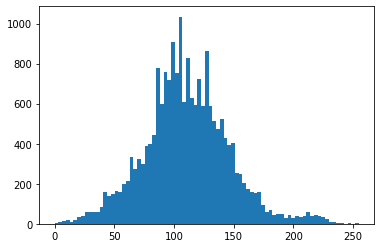


===histogram of 182===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


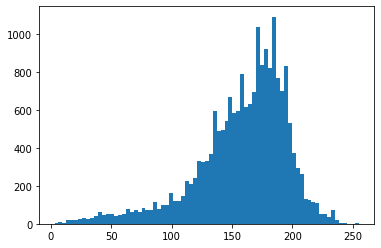


===histogram of 101===
min	 8
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 247
width	 4.494593339478797
# bins	 55


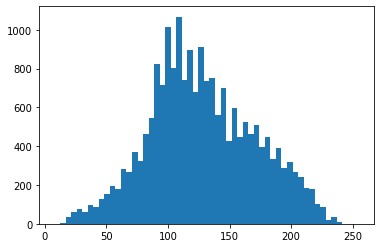


===histogram of 114===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


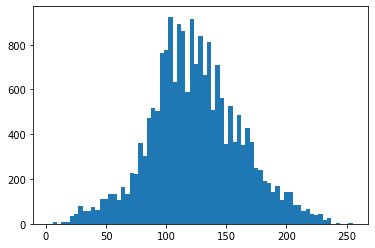


===histogram of 98.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


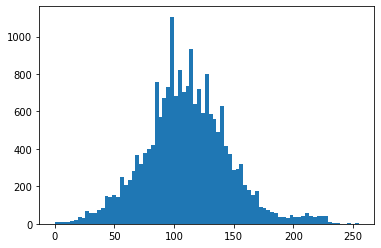


===histogram of 178===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


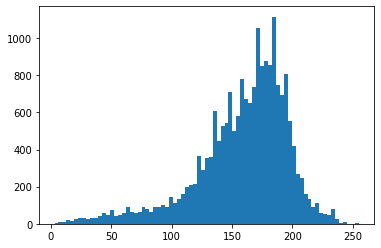


===histogram of 54===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 247
range	 245
width	 4.494593339478797
# bins	 55


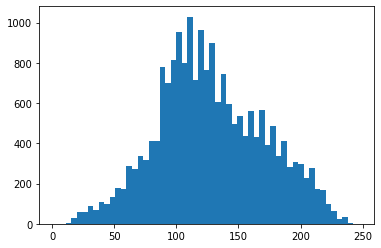


===histogram of 52===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


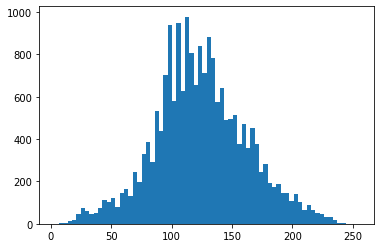


===histogram of 22===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


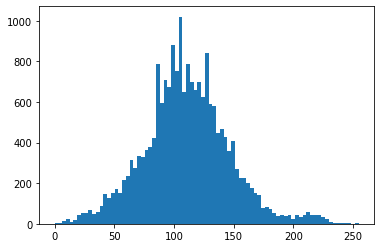


===histogram of 125===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 252
width	 3.3156836110909156
# bins	 77


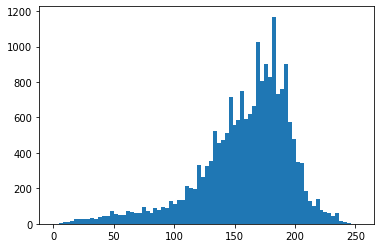


===histogram of 51===
min	 15
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 226
width	 4.494593339478797
# bins	 51


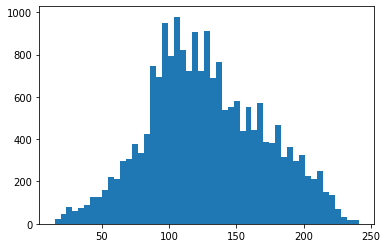


===histogram of 62===
min	 5
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 250
width	 3.6104110431878857
# bins	 70


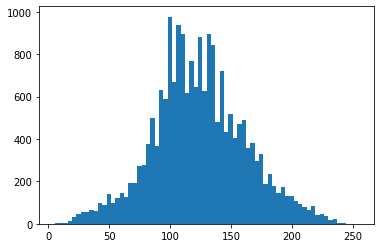


===histogram of 66===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


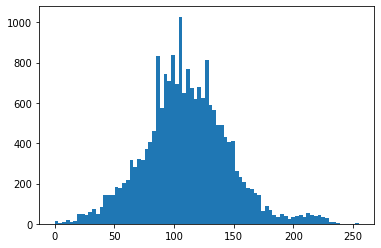


===histogram of 123.1===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 249
width	 3.3156836110909156
# bins	 76


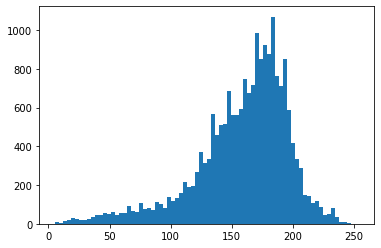


===histogram of 58===
min	 14
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 246
range	 232
width	 4.420911481454554
# bins	 53


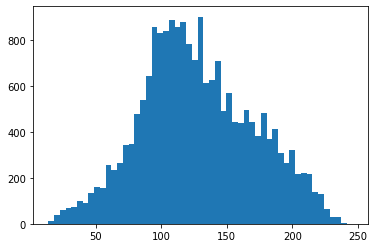


===histogram of 68.1===
min	 4
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


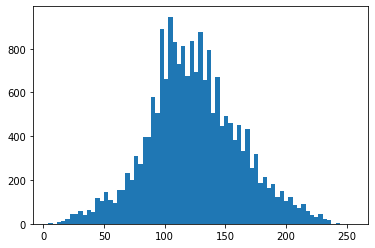


===histogram of 69.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


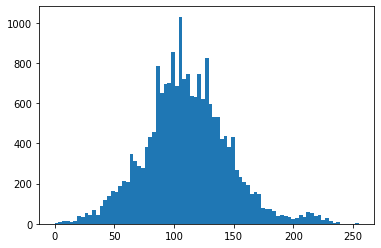


===histogram of 120===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


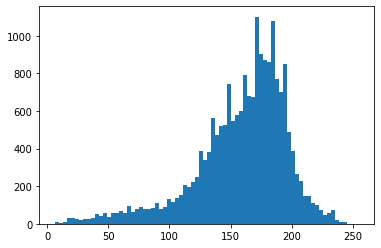


===histogram of 64===
min	 12
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 243
width	 4.420911481454554
# bins	 55


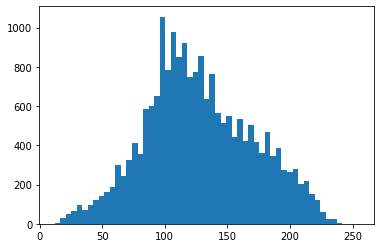


===histogram of 64.1===
min	 1
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 254
width	 3.5367291851636433
# bins	 72


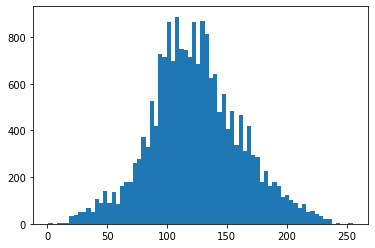


===histogram of 51.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


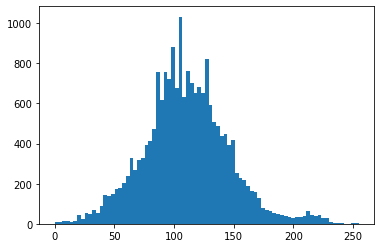


===histogram of 131.1===
min	 2
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 253
width	 3.242001753066673
# bins	 79


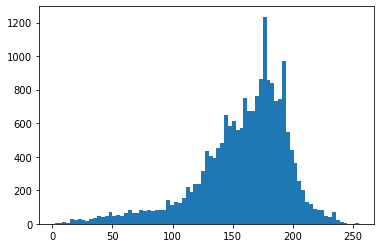


===histogram of 88===
min	 4
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 242
range	 238
width	 4.420911481454554
# bins	 54


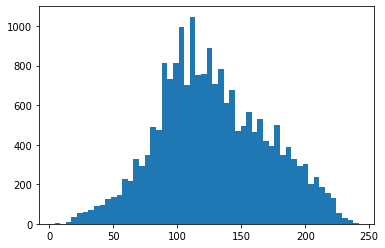


===histogram of 92===
min	 7
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 242
range	 235
width	 3.5367291851636433
# bins	 67


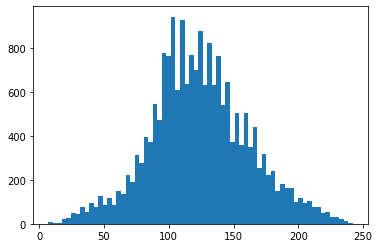


===histogram of 88.1===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


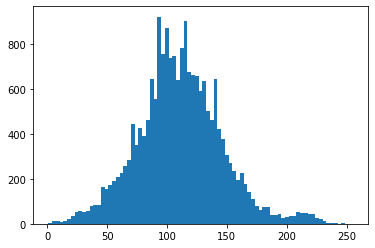


===histogram of 162===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 252
range	 251
width	 3.3156836110909156
# bins	 76


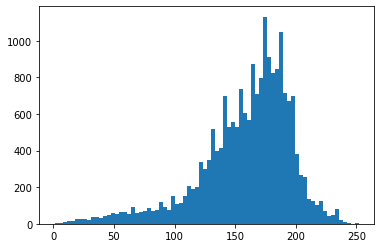


===histogram of 116===
min	 4
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 240
range	 236
width	 4.494593339478797
# bins	 53


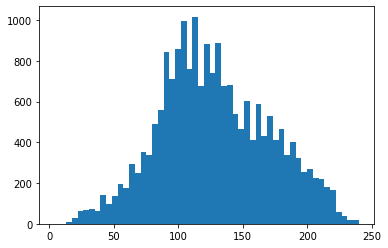


===histogram of 130===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 239
range	 236
width	 3.6104110431878857
# bins	 66


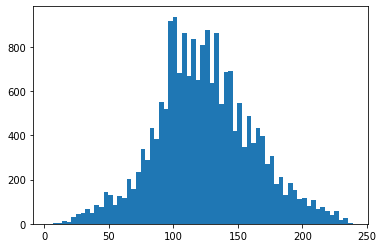


===histogram of 126.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


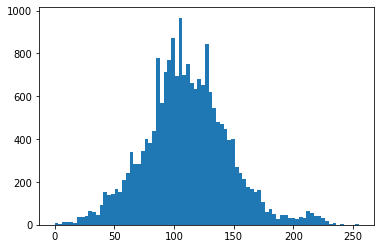


===histogram of 194===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 245
range	 238
width	 3.3156836110909156
# bins	 72


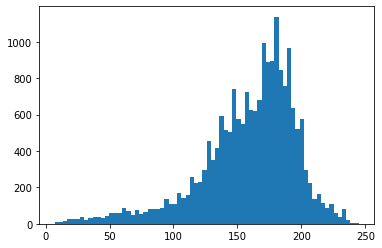


===histogram of 103.1===
min	 14
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 239
range	 225
width	 4.420911481454554
# bins	 51


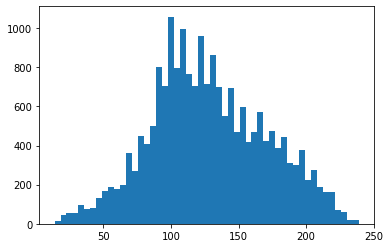


===histogram of 112.1===
min	 5
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 241
range	 236
width	 3.5367291851636433
# bins	 67


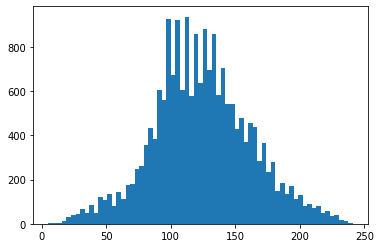


===histogram of 98.2===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


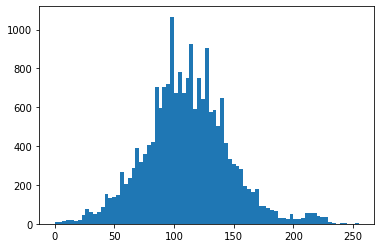


===histogram of 186===
min	 8
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 245
range	 237
width	 3.3156836110909156
# bins	 72


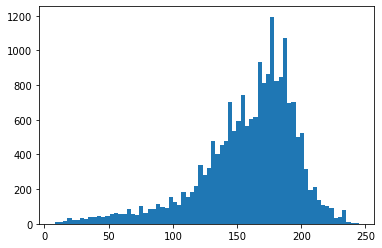


===histogram of 106.1===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 239
range	 239
width	 4.494593339478797
# bins	 54


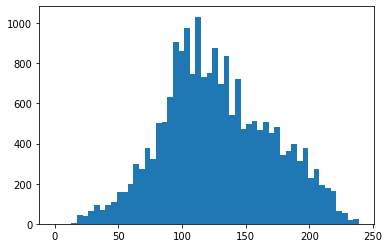


===histogram of 120.1===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 241
range	 239
width	 3.6104110431878857
# bins	 67


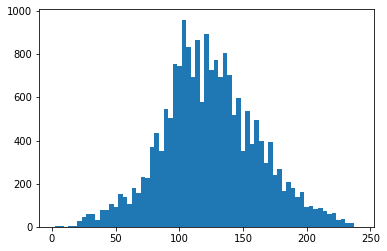


===histogram of 106.2===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 244
range	 244
width	 3.242001753066673
# bins	 76


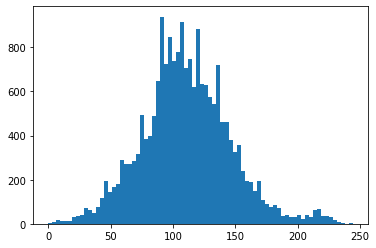


===histogram of 198===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 249
range	 242
width	 3.3156836110909156
# bins	 73


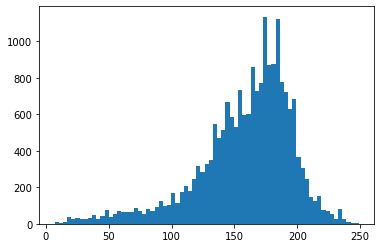


===histogram of 105===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 242
range	 242
width	 4.494593339478797
# bins	 54


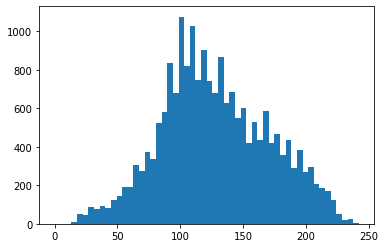


===histogram of 114.1===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


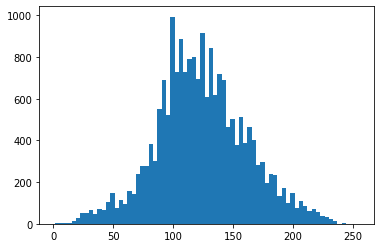


===histogram of 100===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


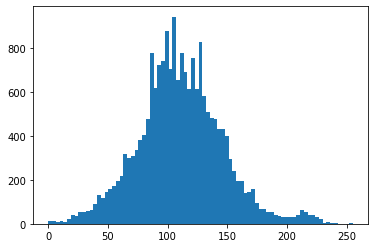


===histogram of 195===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 248
width	 3.3156836110909156
# bins	 75


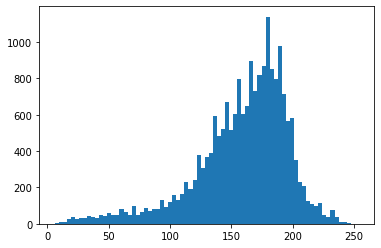


===histogram of 98.3===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 240
width	 4.494593339478797
# bins	 54


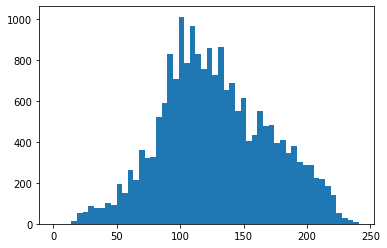


===histogram of 105.1===
min	 1
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 241
range	 240
width	 3.5367291851636433
# bins	 68


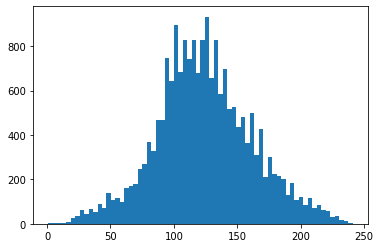


===histogram of 85===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


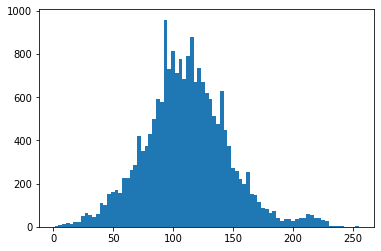


===histogram of 186.1===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 246
width	 3.3156836110909156
# bins	 75


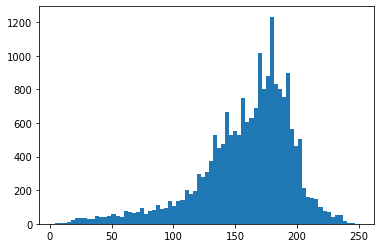


===histogram of 99===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


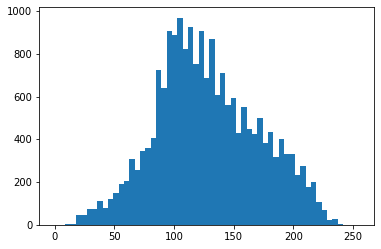


===histogram of 100.1===
min	 4
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


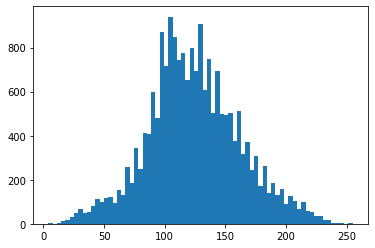


===histogram of 87===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


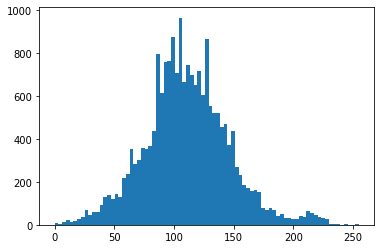


===histogram of 183===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


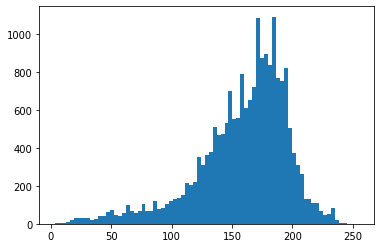


===histogram of 110.1===
min	 12
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 243
range	 231
width	 4.494593339478797
# bins	 52


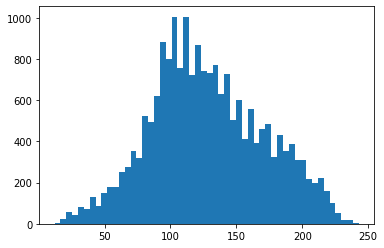


===histogram of 117.1===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 251
width	 3.6104110431878857
# bins	 70


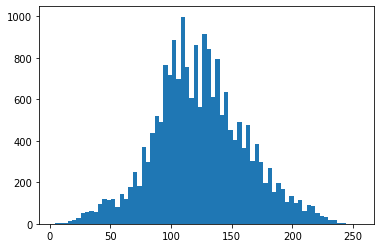


===histogram of 99.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


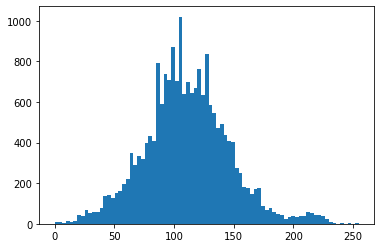


===histogram of 189===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 252
width	 3.3156836110909156
# bins	 77


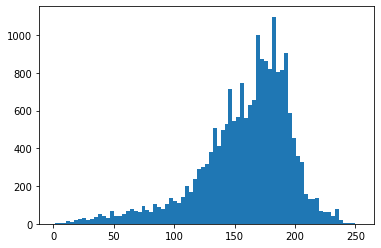


===histogram of 98.4===
min	 11
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 242
range	 231
width	 4.420911481454554
# bins	 53


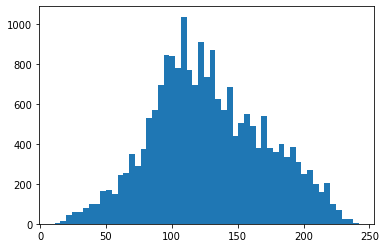


===histogram of 106.3===
min	 4
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


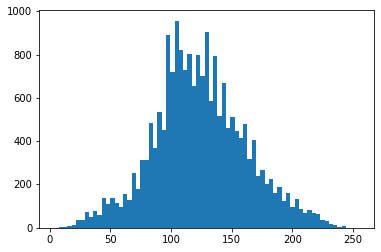


===histogram of 76.1===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


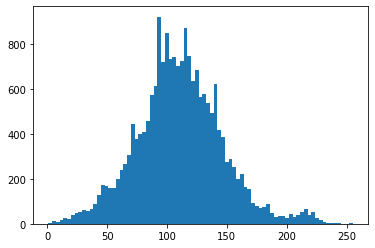


===histogram of 178.1===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 253
width	 3.3156836110909156
# bins	 77


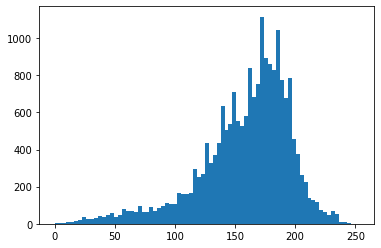


===histogram of 105.2===
min	 9
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 232
width	 4.420911481454554
# bins	 53


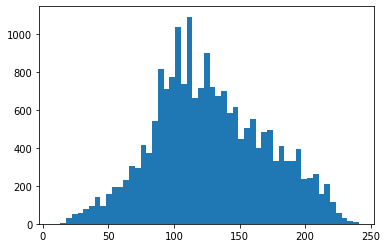


===histogram of 112.2===
min	 4
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


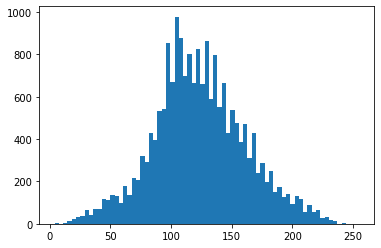


===histogram of 96===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


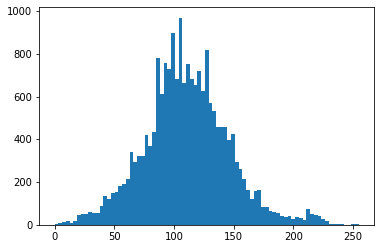


===histogram of 188.1===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 248
width	 3.3156836110909156
# bins	 75


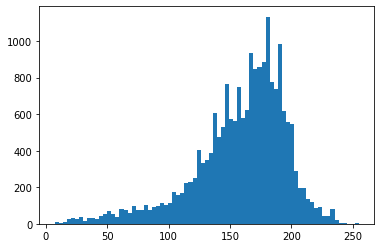


===histogram of 105.3===
min	 12
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 239
range	 227
width	 4.420911481454554
# bins	 52


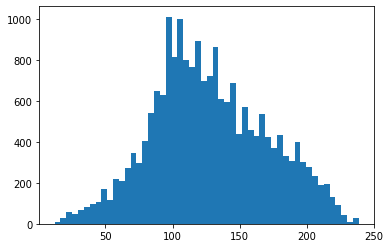


===histogram of 120.2===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


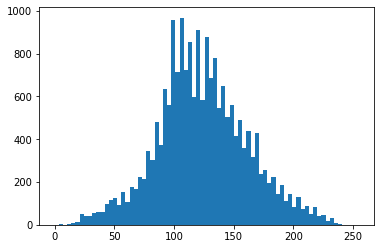


===histogram of 107.2===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


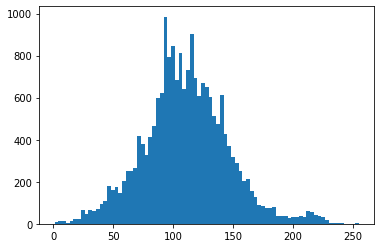


===histogram of 188.2===
min	 4
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 251
width	 3.242001753066673
# bins	 78


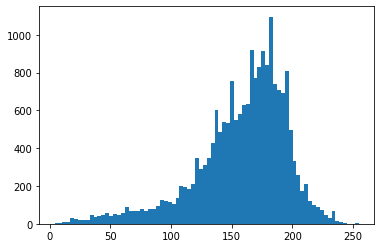


===histogram of 57.1===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 242
width	 4.494593339478797
# bins	 54


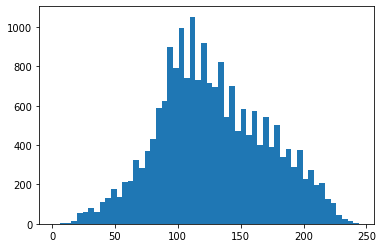


===histogram of 52.1===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 246
range	 242
width	 3.6104110431878857
# bins	 68


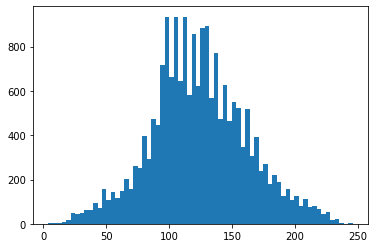


===histogram of 22.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


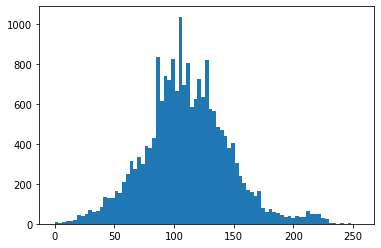


===histogram of 129===
min	 3
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 252
width	 3.242001753066673
# bins	 78


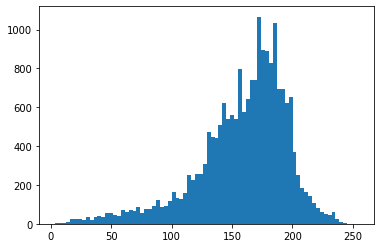


===histogram of 63===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 242
range	 242
width	 4.494593339478797
# bins	 54


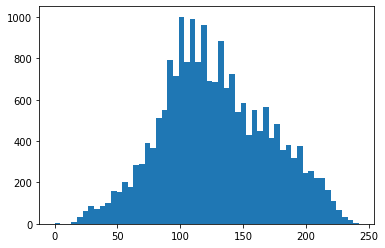


===histogram of 62.1===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 246
range	 244
width	 3.6104110431878857
# bins	 68


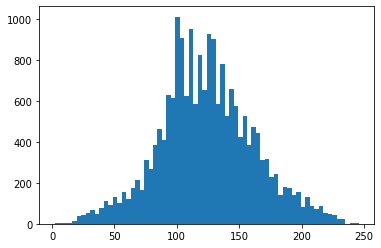


===histogram of 35===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


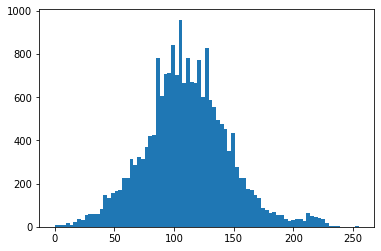


===histogram of 125.1===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 254
width	 3.3156836110909156
# bins	 77


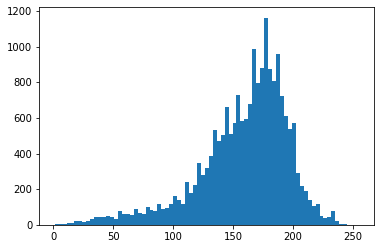


===histogram of 61===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 248
range	 248
width	 4.494593339478797
# bins	 56


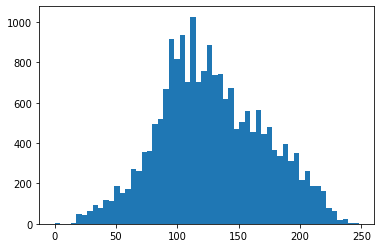


===histogram of 43===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


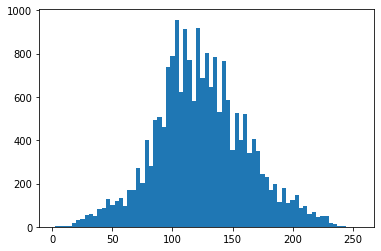


===histogram of 27===
min	 2
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 253
width	 3.242001753066673
# bins	 79


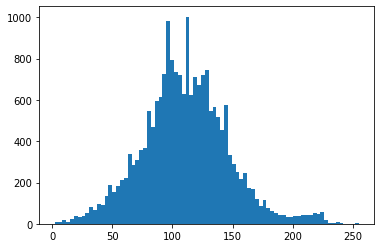


===histogram of 119===
min	 5
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 252
range	 247
width	 3.242001753066673
# bins	 77


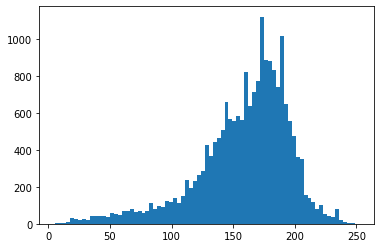


===histogram of 87.1===
min	 0
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 248
range	 248
width	 4.420911481454554
# bins	 57


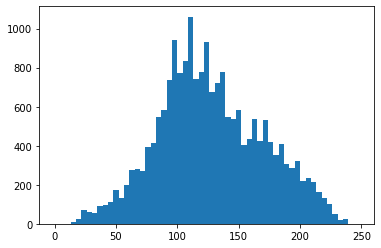


===histogram of 88.2===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


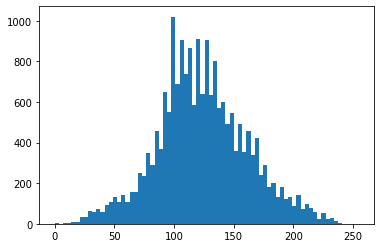


===histogram of 63.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


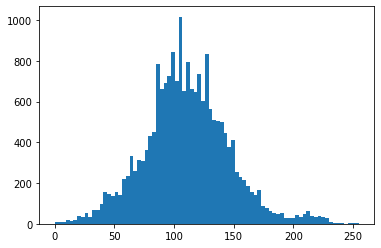


===histogram of 159===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 249
range	 249
width	 3.3156836110909156
# bins	 76


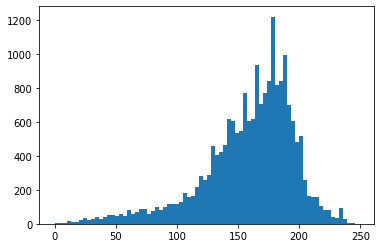


===histogram of 94===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


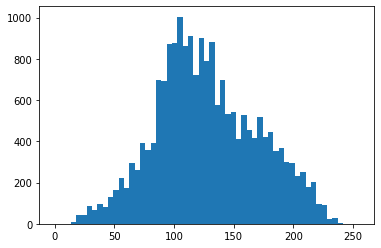


===histogram of 101.1===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


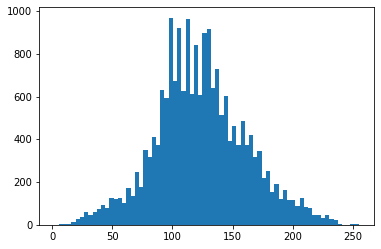


===histogram of 92.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


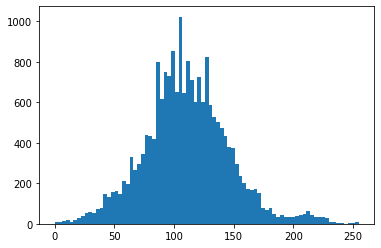


===histogram of 166===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 255
width	 3.3156836110909156
# bins	 77


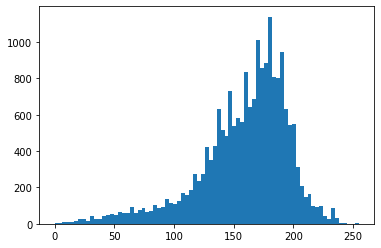


===histogram of 81===
min	 8
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 247
width	 4.420911481454554
# bins	 56


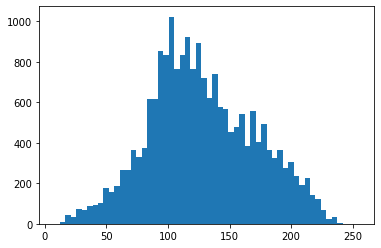


===histogram of 86===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


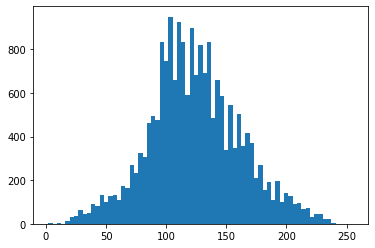


===histogram of 67===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


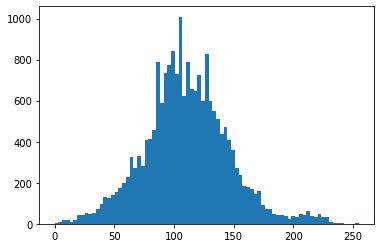


===histogram of 153===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


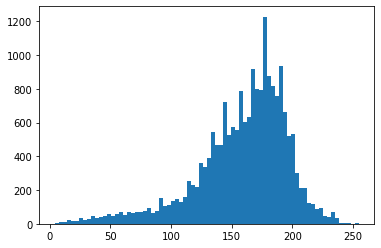


===histogram of 67.1===
min	 4
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 240
width	 4.494593339478797
# bins	 54


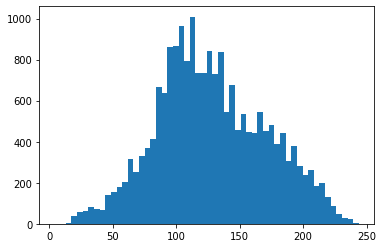


===histogram of 74===
min	 1
25.0%	 99.5
75.0%	 148.0
ibqr	 48.5
iqr	 48.5
max	 255
range	 254
width	 3.5735701141757645
# bins	 72


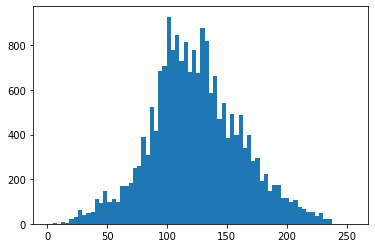


===histogram of 47===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


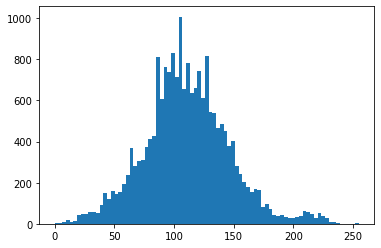


===histogram of 139===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 250
width	 3.3156836110909156
# bins	 76


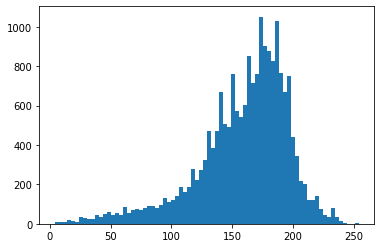


===histogram of 86.1===
min	 3
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 245
range	 242
width	 4.494593339478797
# bins	 54


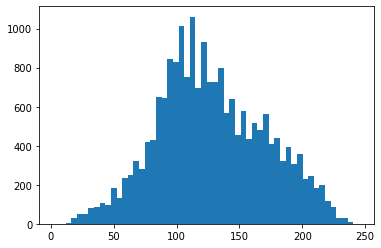


===histogram of 92.2===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


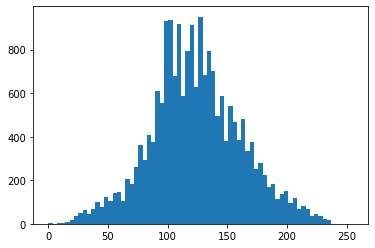


===histogram of 65===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


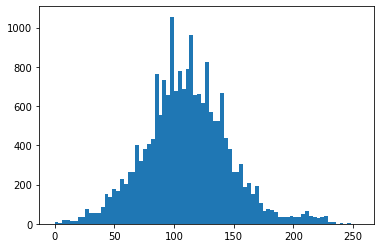


===histogram of 167===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 252
range	 247
width	 3.3156836110909156
# bins	 75


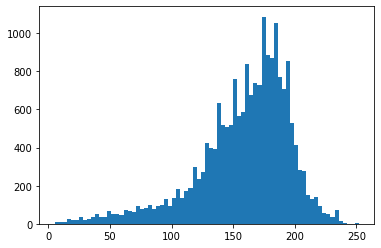


===histogram of 119.1===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 242
width	 4.494593339478797
# bins	 54


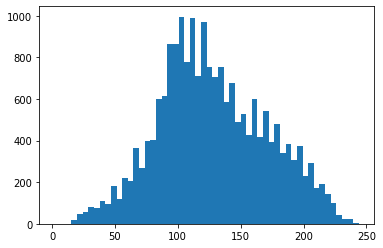


===histogram of 133===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


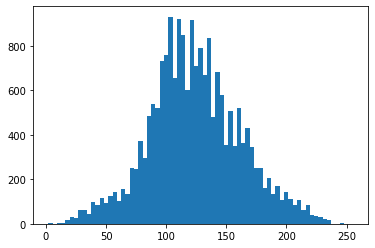


===histogram of 116.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


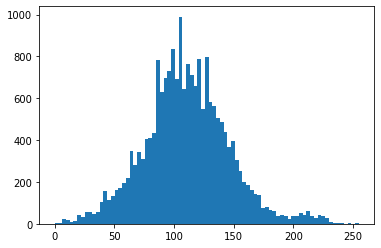


===histogram of 203===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 249
range	 248
width	 3.3156836110909156
# bins	 75


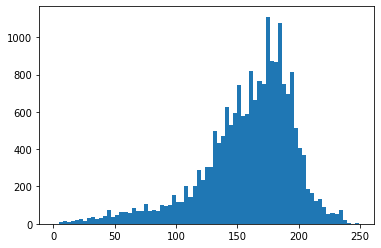


===histogram of 113===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 238
range	 236
width	 4.494593339478797
# bins	 53


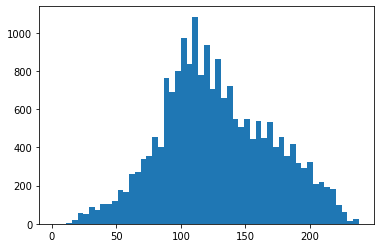


===histogram of 122.1===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


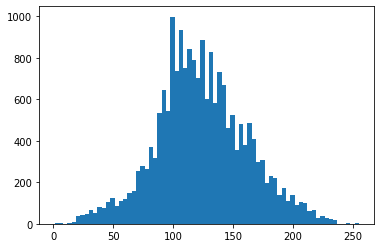


===histogram of 94.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


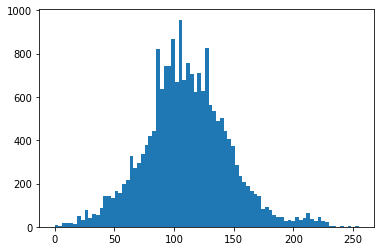


===histogram of 196===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 249
width	 3.3156836110909156
# bins	 76


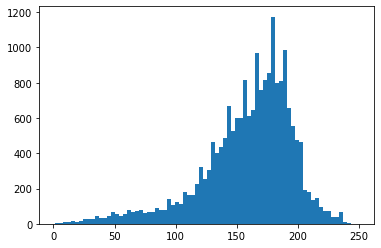


===histogram of 123.2===
min	 3
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 252
width	 4.420911481454554
# bins	 58


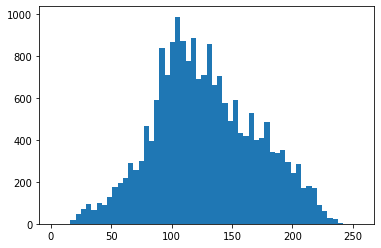


===histogram of 141.1===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


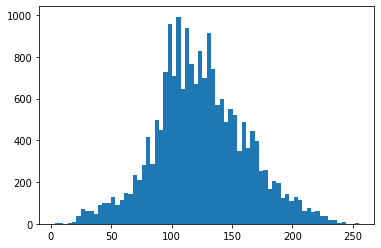


===histogram of 121===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


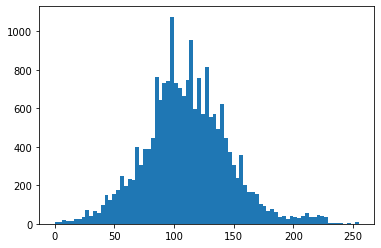


===histogram of 207===
min	 2
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 253
range	 251
width	 3.242001753066673
# bins	 78


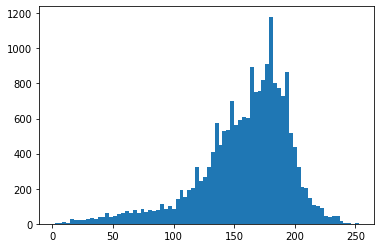


===histogram of 109===
min	 15
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 228
width	 4.420911481454554
# bins	 52


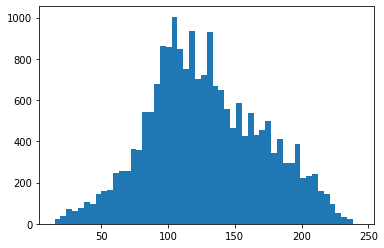


===histogram of 124===
min	 3
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 246
range	 243
width	 3.5367291851636433
# bins	 69


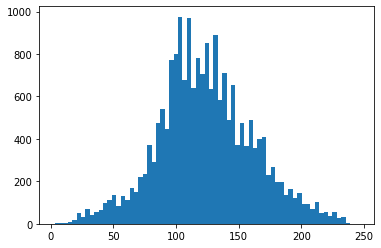


===histogram of 104===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


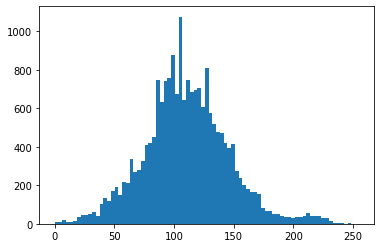


===histogram of 198.1===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 252
width	 3.3156836110909156
# bins	 77


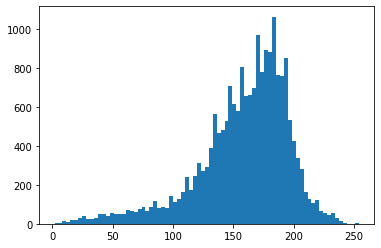


===histogram of 122.2===
min	 15
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 228
width	 4.420911481454554
# bins	 52


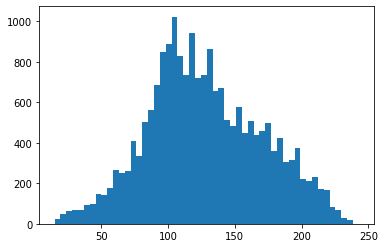


===histogram of 134===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 249
width	 3.5367291851636433
# bins	 71


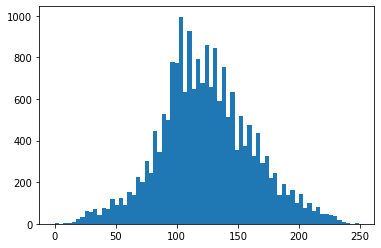


===histogram of 122.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


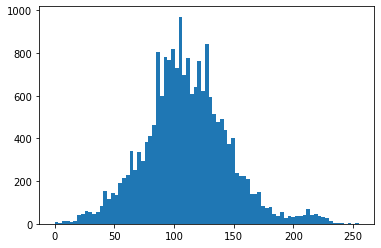


===histogram of 202===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 248
width	 3.3156836110909156
# bins	 75


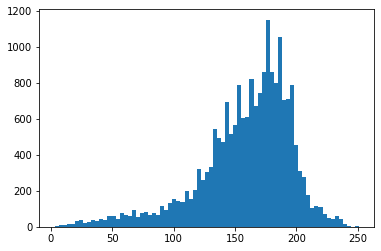


===histogram of 67.2===
min	 13
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 239
range	 226
width	 4.494593339478797
# bins	 51


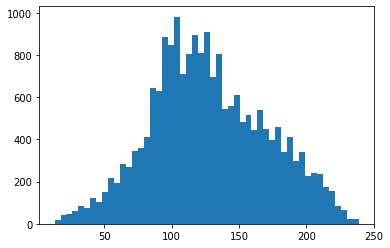


===histogram of 65.1===
min	 3
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


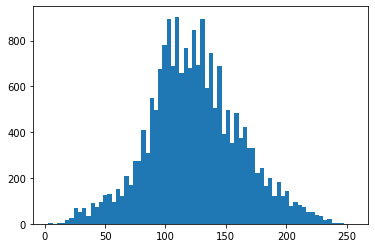


===histogram of 42.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


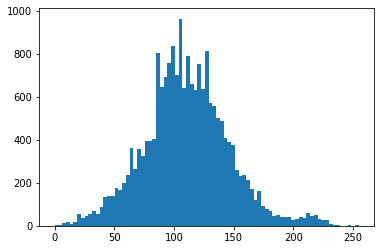


===histogram of 142===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 247
range	 245
width	 3.3156836110909156
# bins	 74


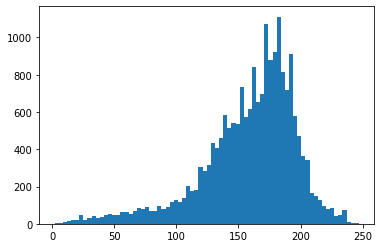


===histogram of 69.2===
min	 9
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 242
range	 233
width	 4.420911481454554
# bins	 53


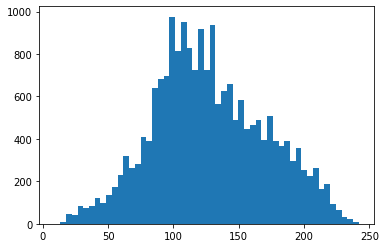


===histogram of 77.1===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


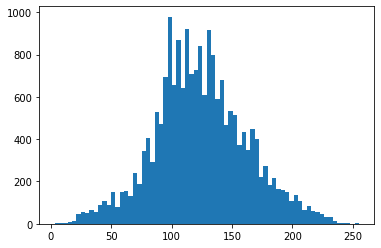


===histogram of 79===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


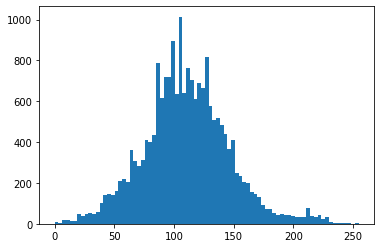


===histogram of 144===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 251
width	 3.3156836110909156
# bins	 76


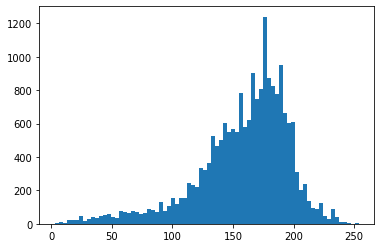


===histogram of 62.2===
min	 11
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 244
range	 233
width	 4.420911481454554
# bins	 53


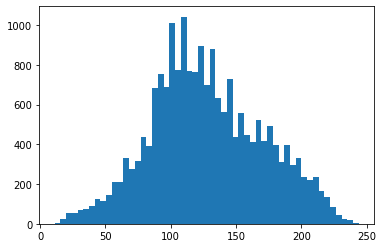


===histogram of 66.1===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


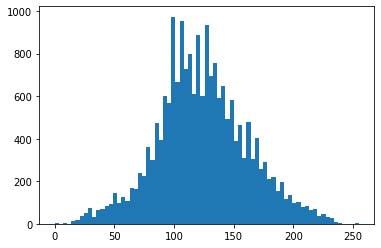


===histogram of 54.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


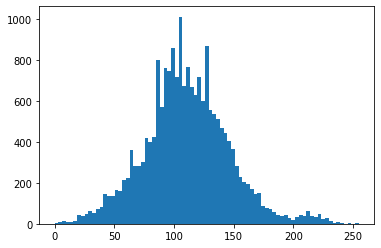


===histogram of 125.2===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


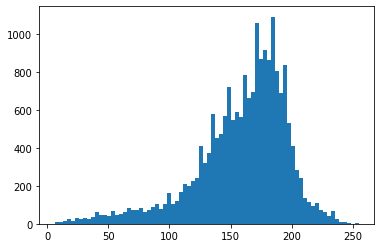


===histogram of 68.2===
min	 12
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 229
width	 4.420911481454554
# bins	 52


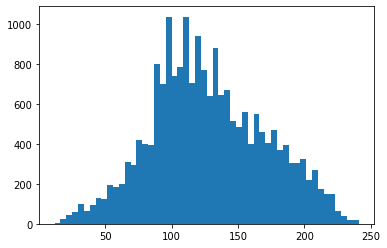


===histogram of 70===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 246
range	 244
width	 3.6104110431878857
# bins	 68


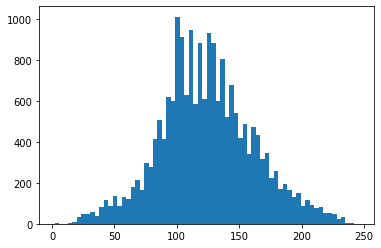


===histogram of 54.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


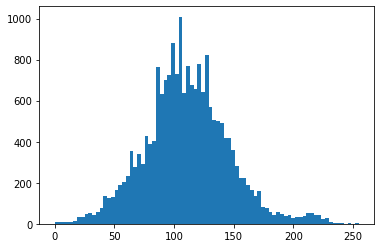


===histogram of 139.1===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 251
width	 3.3156836110909156
# bins	 76


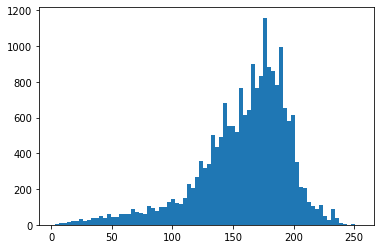


===histogram of 92.3===
min	 8
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 236
width	 4.494593339478797
# bins	 53


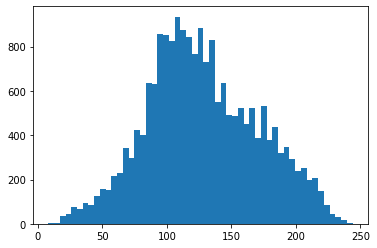


===histogram of 94.2===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


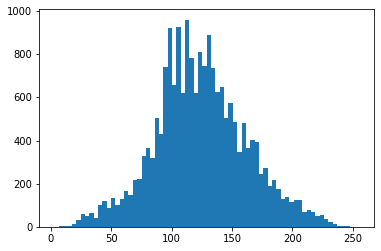


===histogram of 88.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


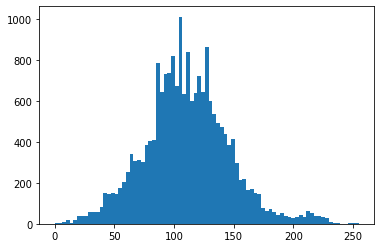


===histogram of 166.1===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 251
width	 3.3156836110909156
# bins	 76


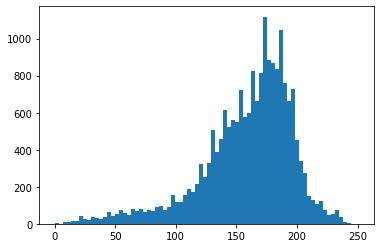


===histogram of 118.1===
min	 11
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 244
range	 233
width	 4.420911481454554
# bins	 53


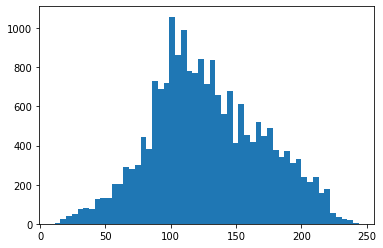


===histogram of 131.2===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 242
range	 239
width	 3.6104110431878857
# bins	 67


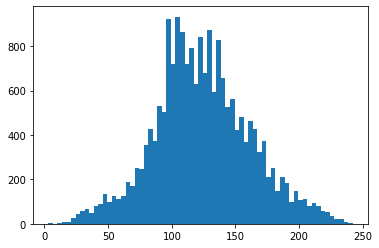


===histogram of 125.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


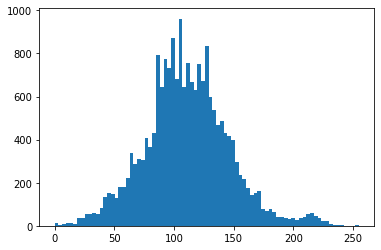


===histogram of 194.1===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 244
range	 241
width	 3.3156836110909156
# bins	 73


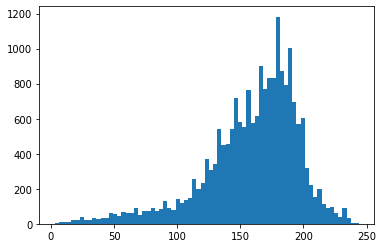


===histogram of 102.1===
min	 9
25.0%	 99.0
75.0%	 158.0
ibqr	 59.0
iqr	 59.0
max	 255
range	 246
width	 4.347229623430311
# bins	 57


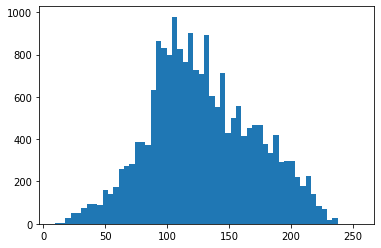


===histogram of 113.1===
min	 4
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


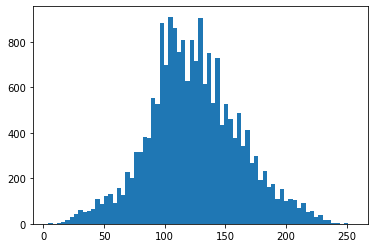


===histogram of 94.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


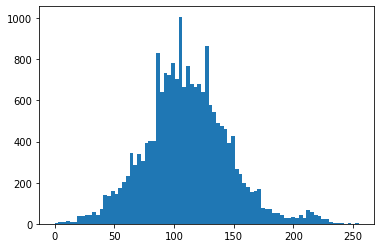


===histogram of 187===
min	 3
25.0%	 141.0
75.0%	 185.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 252
width	 3.242001753066673
# bins	 78


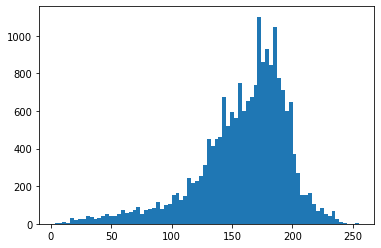


===histogram of 106.4===
min	 0
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 255
width	 4.420911481454554
# bins	 58


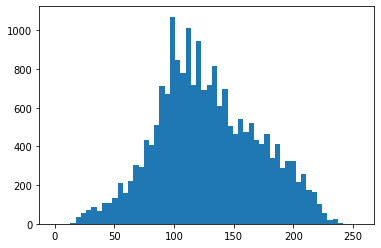


===histogram of 119.2===
min	 7
25.0%	 100.0
75.0%	 147.0
ibqr	 47.0
iqr	 47.0
max	 255
range	 248
width	 3.463047327139401
# bins	 72


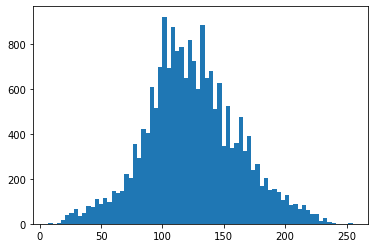


===histogram of 104.1===
min	 1
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 254
width	 3.242001753066673
# bins	 79


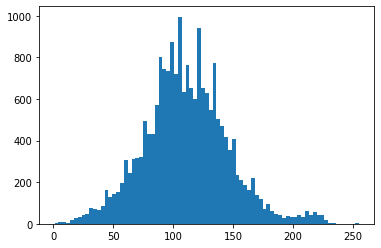


===histogram of 199.2===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 248
width	 3.3156836110909156
# bins	 75


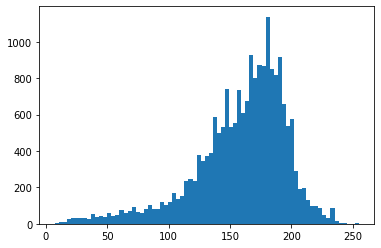


===histogram of 104.2===
min	 1
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 238
range	 237
width	 4.420911481454554
# bins	 54


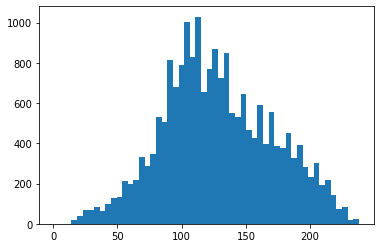


===histogram of 114.2===
min	 4
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 246
range	 242
width	 3.5367291851636433
# bins	 69


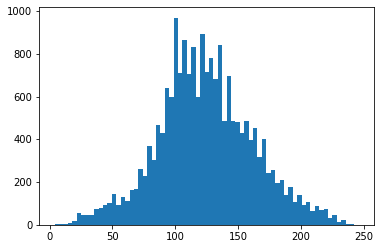


===histogram of 97===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


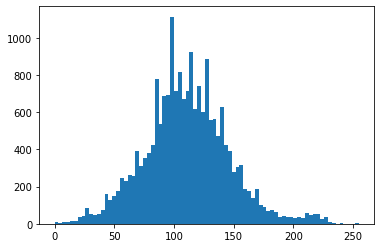


===histogram of 193.1===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 247
width	 3.3156836110909156
# bins	 75


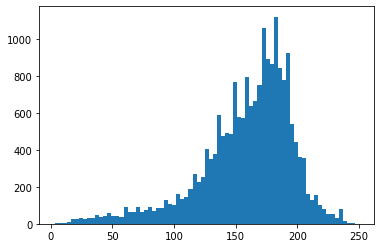


===histogram of 101.2===
min	 13
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 242
width	 4.420911481454554
# bins	 55


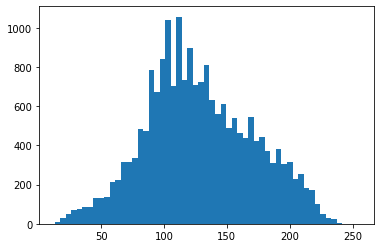


===histogram of 111.2===
min	 3
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


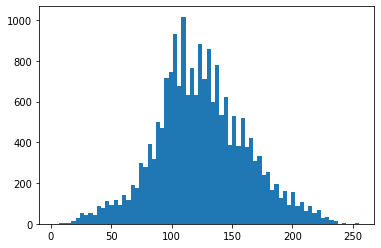


===histogram of 94.4===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


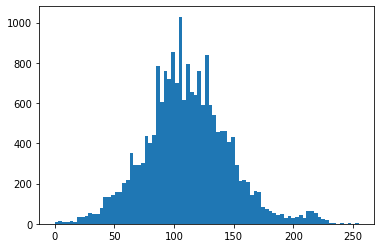


===histogram of 195.1===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 252
range	 245
width	 3.3156836110909156
# bins	 74


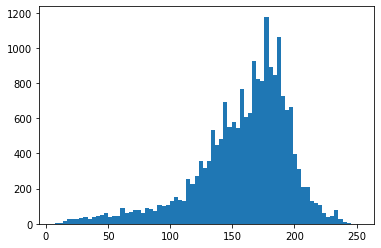


===histogram of 71===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 245
range	 245
width	 4.494593339478797
# bins	 55


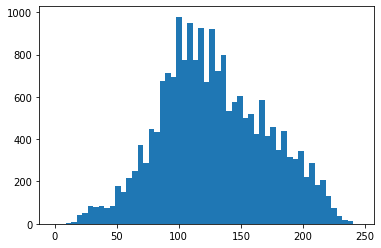


===histogram of 55===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


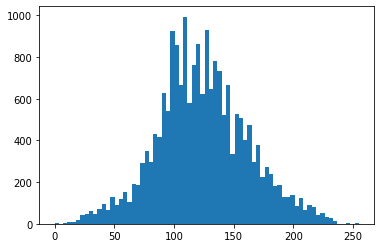


===histogram of 24===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


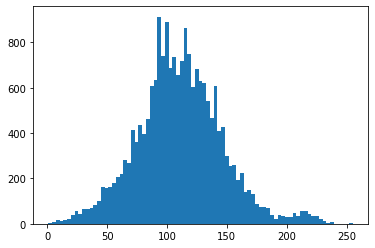


===histogram of 153.1===
min	 6
25.0%	 139.0
75.0%	 185.0
ibqr	 46.0
iqr	 46.0
max	 250
range	 244
width	 3.389365469115158
# bins	 72


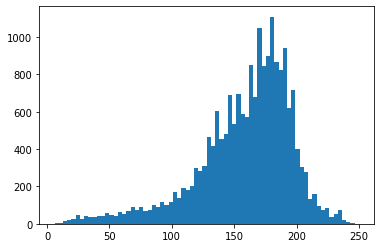


===histogram of 135===
min	 14
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 246
range	 232
width	 4.494593339478797
# bins	 52


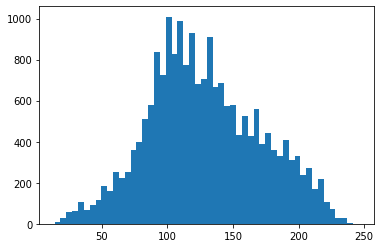


===histogram of 144.1===
min	 6
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 249
width	 3.6104110431878857
# bins	 69


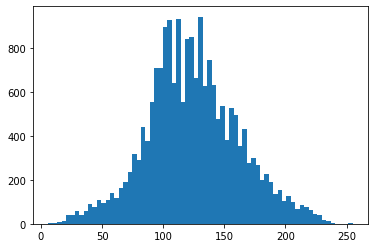


===histogram of 135.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


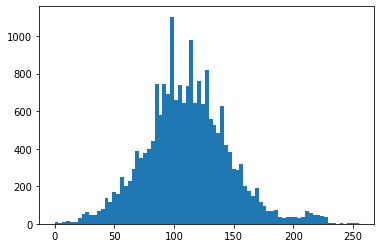


===histogram of 213===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 249
width	 3.3156836110909156
# bins	 76


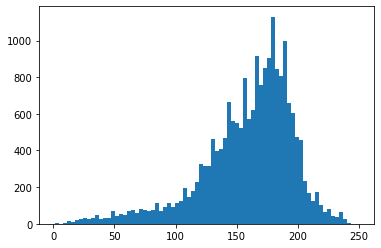


===histogram of 122.4===
min	 11
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 239
range	 228
width	 4.494593339478797
# bins	 51


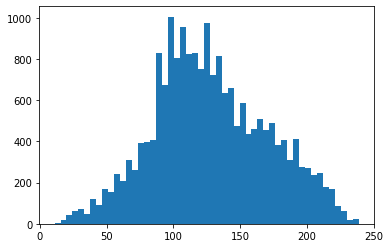


===histogram of 125.4===
min	 8
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 247
width	 3.6104110431878857
# bins	 69


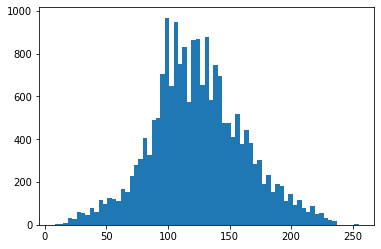


===histogram of 111.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


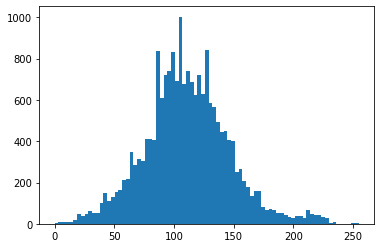


===histogram of 197.1===
min	 8
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 245
width	 3.3156836110909156
# bins	 74


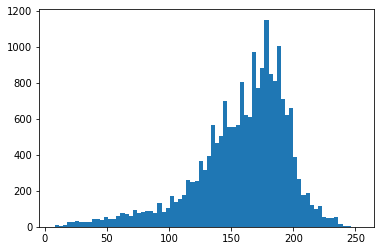


===histogram of 113.2===
min	 9
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 246
width	 4.420911481454554
# bins	 56


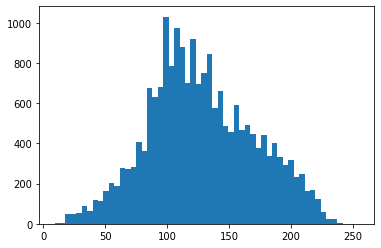


===histogram of 115.1===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


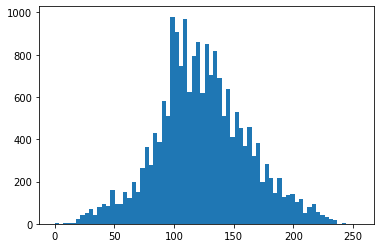


===histogram of 99.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


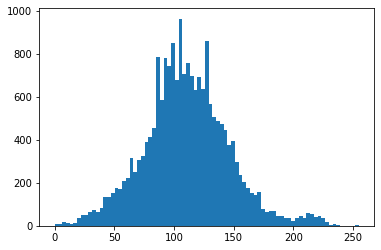


===histogram of 192===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 247
width	 3.3156836110909156
# bins	 75


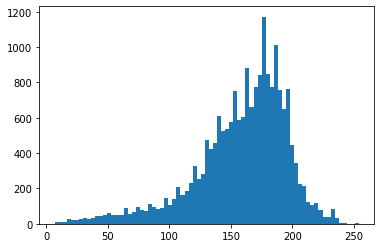


===histogram of 78===
min	 14
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 244
range	 230
width	 4.420911481454554
# bins	 53


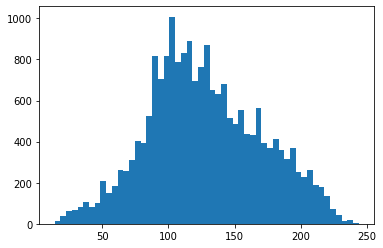


===histogram of 74.1===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 246
range	 246
width	 3.5367291851636433
# bins	 70


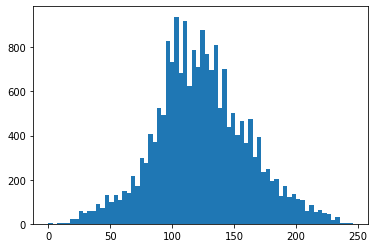


===histogram of 32===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


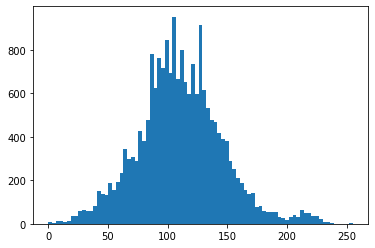


===histogram of 153.2===
min	 4
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 245
range	 241
width	 3.242001753066673
# bins	 75


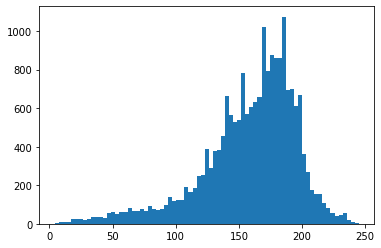


===histogram of 113.3===
min	 16
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 227
width	 4.420911481454554
# bins	 52


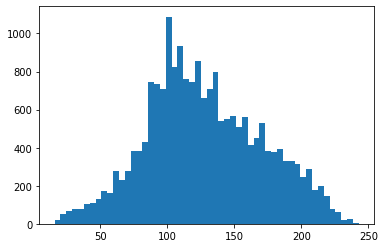


===histogram of 124.1===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 246
range	 243
width	 3.6104110431878857
# bins	 68


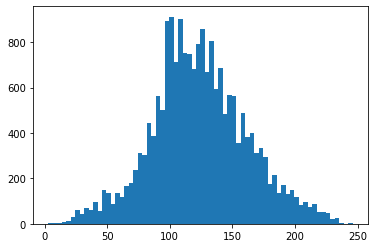


===histogram of 120.3===
min	 2
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 253
width	 3.1683198950424303
# bins	 80


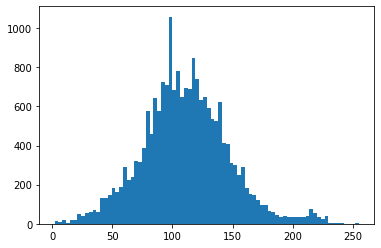


===histogram of 192.1===
min	 6
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 247
range	 241
width	 3.242001753066673
# bins	 75


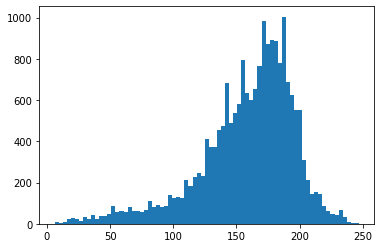


===histogram of 58.1===
min	 10
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 240
range	 230
width	 4.494593339478797
# bins	 52


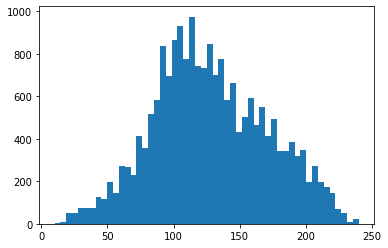


===histogram of 49===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 249
range	 247
width	 3.6104110431878857
# bins	 69


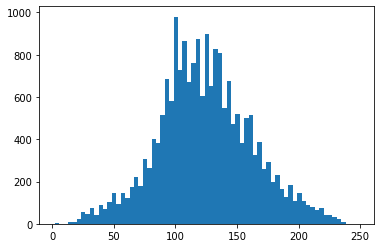


===histogram of 27.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 249
range	 249
width	 3.1683198950424303
# bins	 79


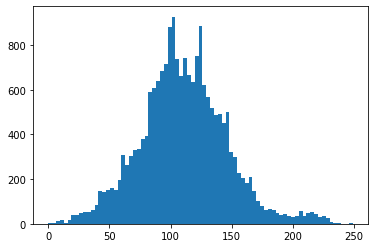


===histogram of 117.2===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 245
width	 3.3156836110909156
# bins	 74


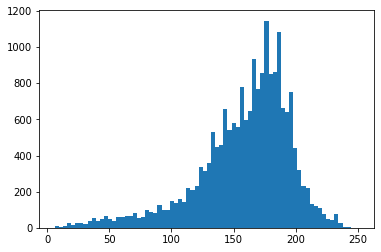


===histogram of 63.2===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 245
range	 244
width	 4.494593339478797
# bins	 55


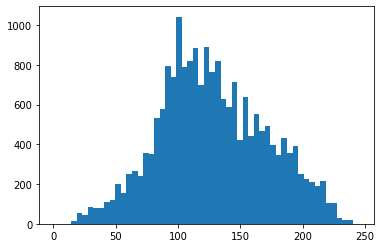


===histogram of 47.1===
min	 5
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 250
width	 3.5367291851636433
# bins	 71


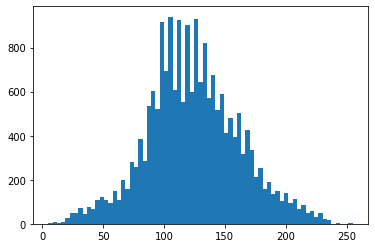


===histogram of 25===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


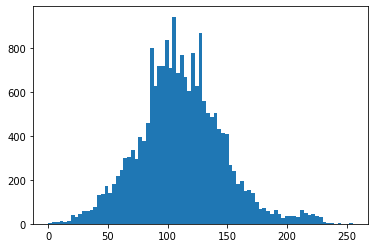


===histogram of 117.3===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 253
range	 249
width	 3.3156836110909156
# bins	 76


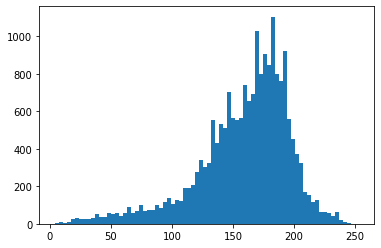


===histogram of 70.1===
min	 2
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 250
range	 248
width	 4.420911481454554
# bins	 57


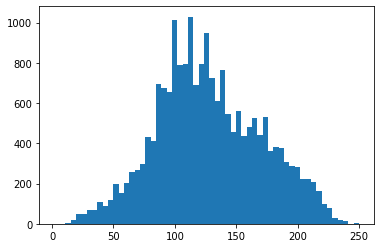


===histogram of 69.3===
min	 0
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


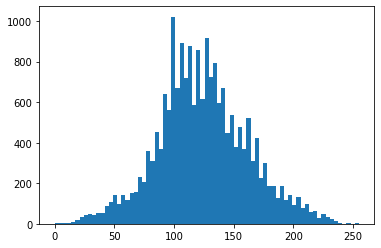


===histogram of 46===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


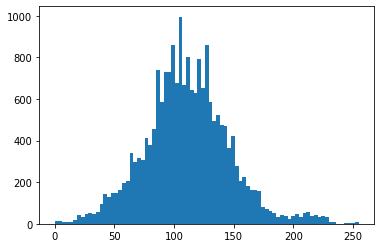


===histogram of 140===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 253
width	 3.3156836110909156
# bins	 77


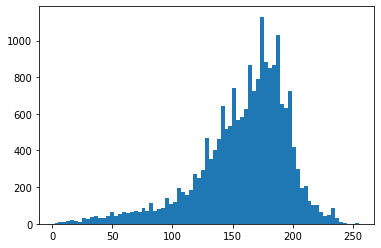


===histogram of 65.2===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 243
range	 243
width	 4.494593339478797
# bins	 55


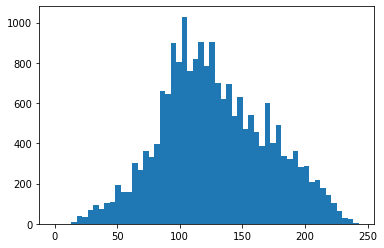


===histogram of 64.2===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


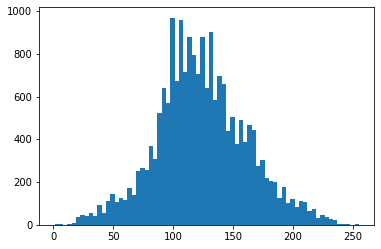


===histogram of 41===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


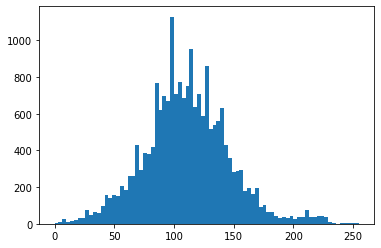


===histogram of 130.1===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 250
width	 3.3156836110909156
# bins	 76


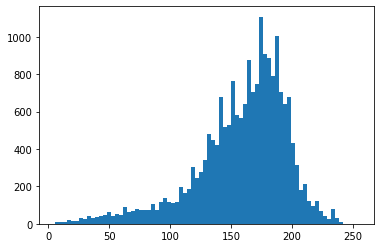


===histogram of 81.1===
min	 4
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 251
width	 4.494593339478797
# bins	 56


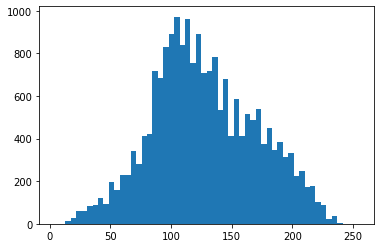


===histogram of 87.2===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


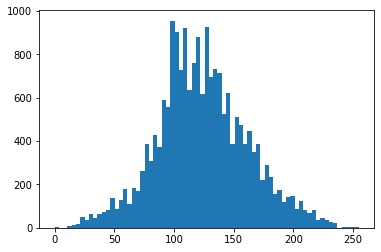


===histogram of 72===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


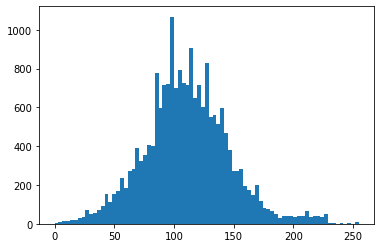


===histogram of 150===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


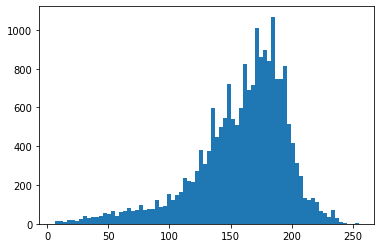


===histogram of 95.1===
min	 10
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 245
width	 4.494593339478797
# bins	 55


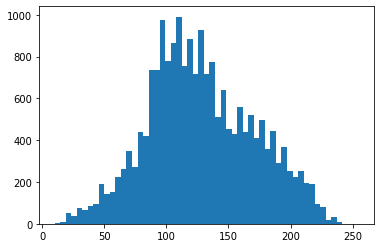


===histogram of 109.1===
min	 3
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


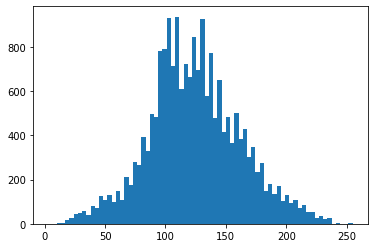


===histogram of 95.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


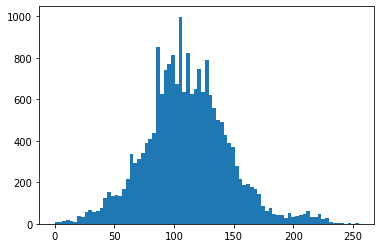


===histogram of 172===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 249
width	 3.3156836110909156
# bins	 76


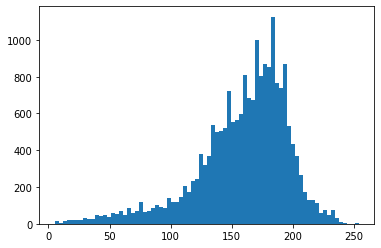


===histogram of 98.5===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


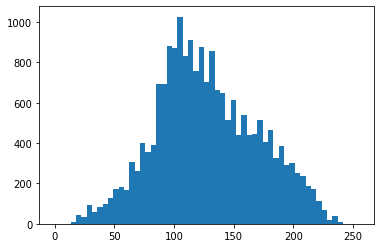


===histogram of 105.4===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


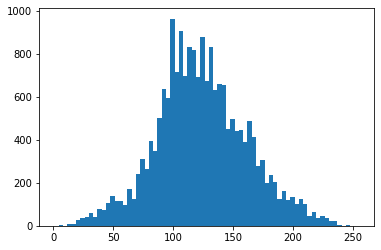


===histogram of 85.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


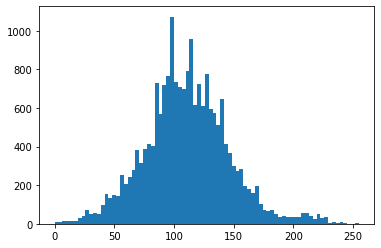


===histogram of 180.1===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 253
width	 3.3156836110909156
# bins	 77


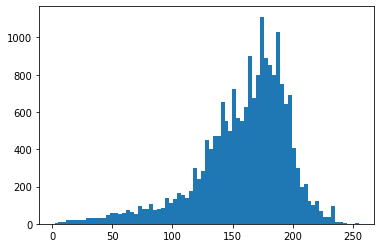


===histogram of 115.2===
min	 11
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 248
range	 237
width	 4.494593339478797
# bins	 53


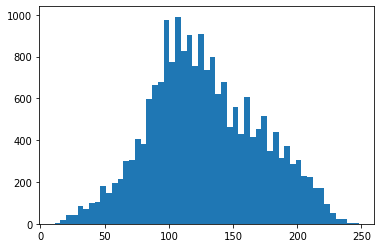


===histogram of 131.3===
min	 0
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


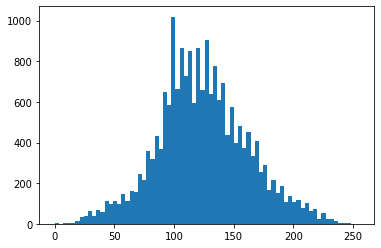


===histogram of 120.4===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


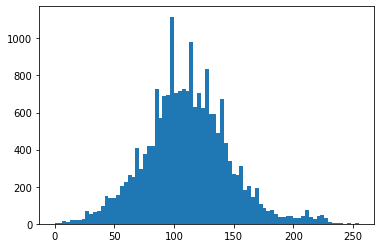


===histogram of 200===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 250
width	 3.3156836110909156
# bins	 76


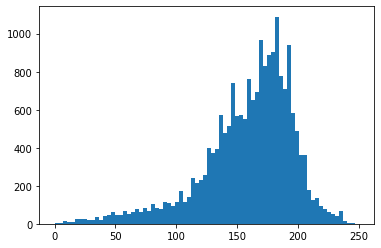


===histogram of 111.4===
min	 12
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 243
range	 231
width	 4.494593339478797
# bins	 52


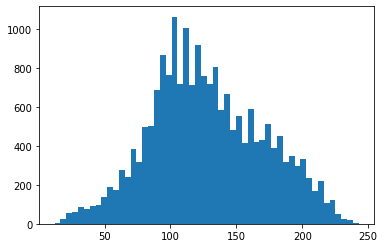


===histogram of 126.2===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


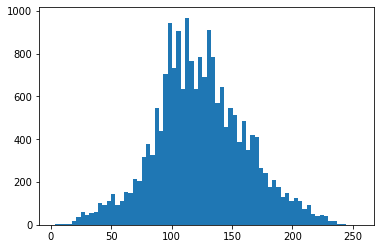


===histogram of 105.5===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


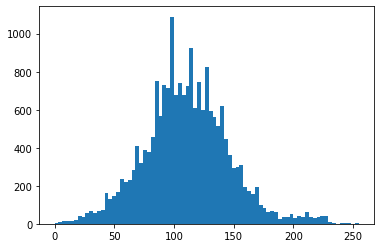


===histogram of 199.3===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 247
range	 246
width	 3.3156836110909156
# bins	 75


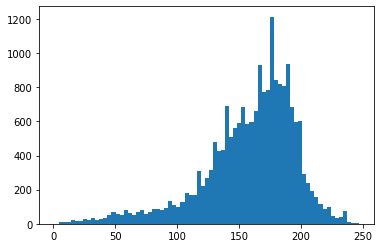


===histogram of 116.2===
min	 14
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 227
width	 4.420911481454554
# bins	 52


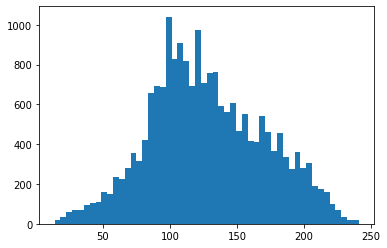


===histogram of 133.1===
min	 3
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


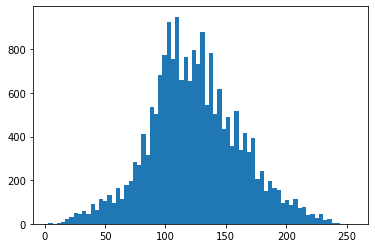


===histogram of 113.4===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


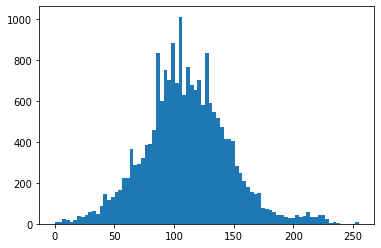


===histogram of 202.1===
min	 2
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 247
range	 245
width	 3.242001753066673
# bins	 76


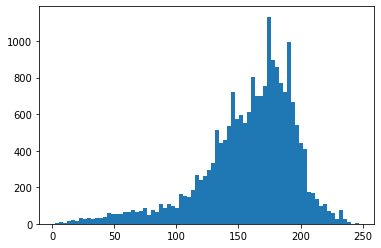


===histogram of 103.2===
min	 16
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 249
range	 233
width	 4.420911481454554
# bins	 53


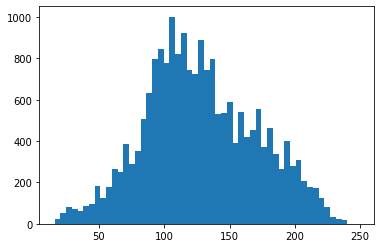


===histogram of 119.3===
min	 6
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 249
width	 3.5367291851636433
# bins	 71


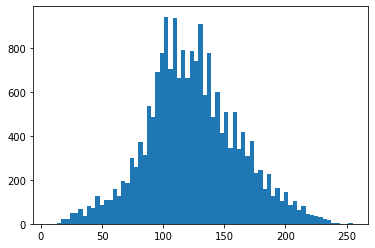


===histogram of 91===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


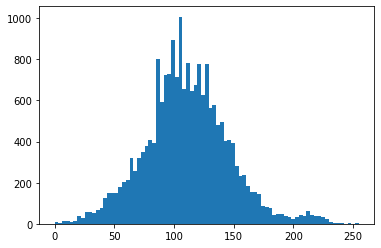


===histogram of 190===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 248
width	 3.3156836110909156
# bins	 75


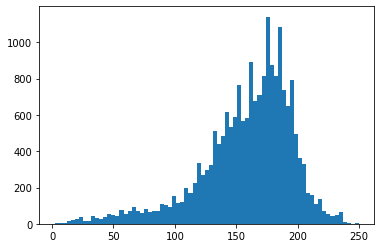


===histogram of 90===
min	 8
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 247
width	 4.494593339478797
# bins	 55


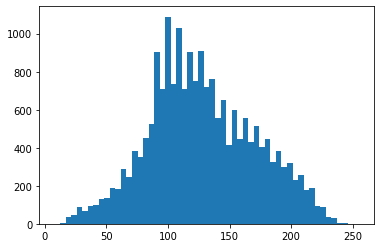


===histogram of 98.6===
min	 4
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 251
width	 3.5367291851636433
# bins	 71


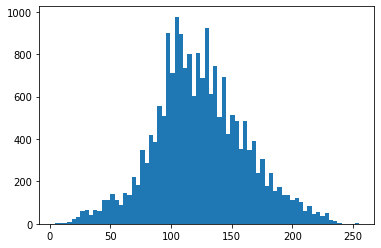


===histogram of 65.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


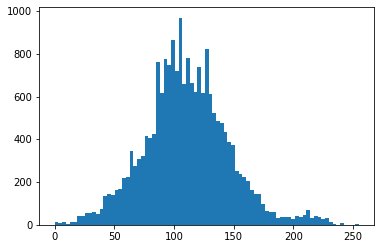


===histogram of 166.2===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 254
width	 3.3156836110909156
# bins	 77


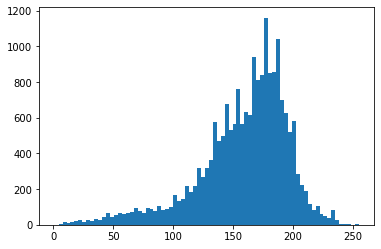


===histogram of 56===
min	 9
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 235
width	 4.494593339478797
# bins	 53


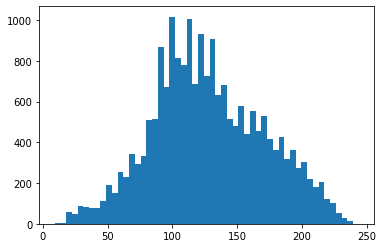


===histogram of 53===
min	 6
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 246
range	 240
width	 3.5367291851636433
# bins	 68


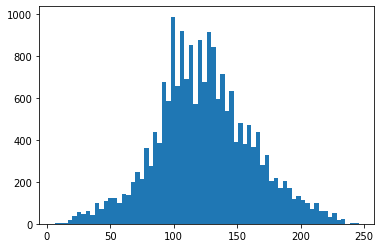


===histogram of 22.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


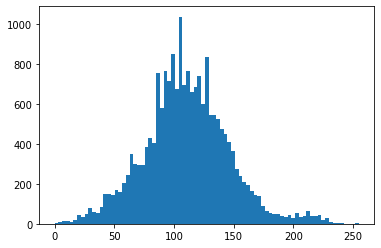


===histogram of 126.3===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 246
range	 245
width	 3.3156836110909156
# bins	 74


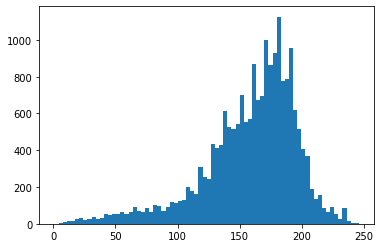


===histogram of 67.3===
min	 13
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 242
width	 4.494593339478797
# bins	 54


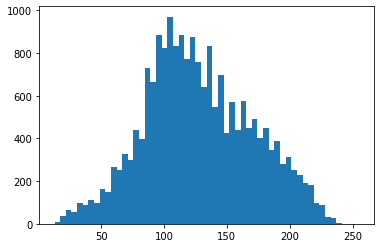


===histogram of 71.1===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


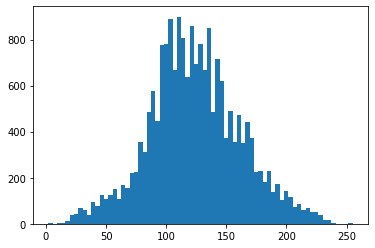


===histogram of 70.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


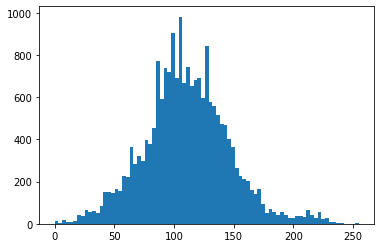


===histogram of 132===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 248
width	 3.3156836110909156
# bins	 75


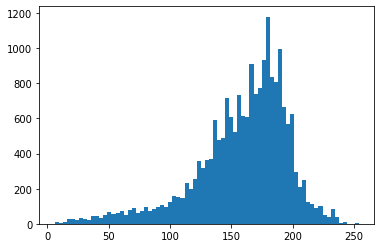


===histogram of 69.4===
min	 5
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 250
width	 4.420911481454554
# bins	 57


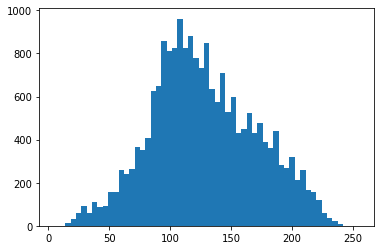


===histogram of 73===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 251
width	 3.6104110431878857
# bins	 70


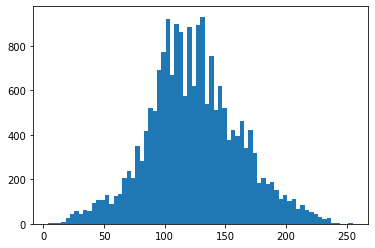


===histogram of 64.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


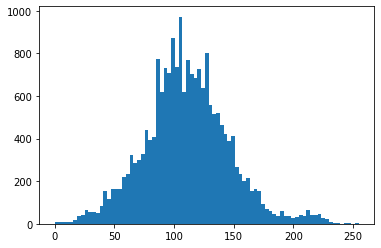


===histogram of 140.1===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 248
range	 241
width	 3.3156836110909156
# bins	 73


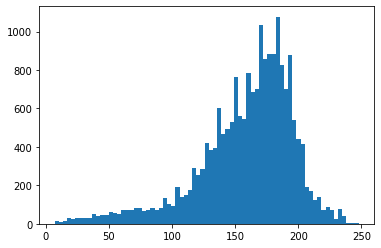


===histogram of 105.6===
min	 10
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 246
range	 236
width	 4.420911481454554
# bins	 54


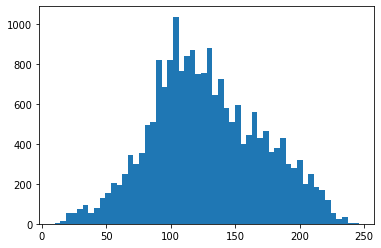


===histogram of 120.5===
min	 6
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 249
width	 3.5367291851636433
# bins	 71


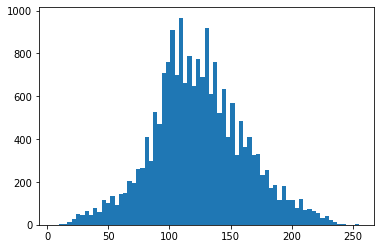


===histogram of 122.5===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


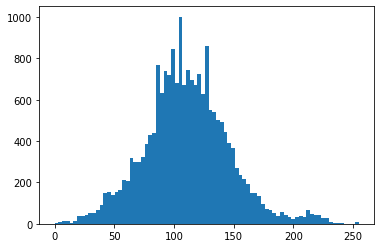


===histogram of 184===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


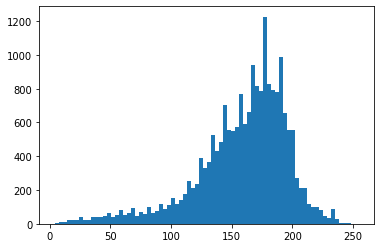


===histogram of 105.7===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 240
range	 240
width	 4.494593339478797
# bins	 54


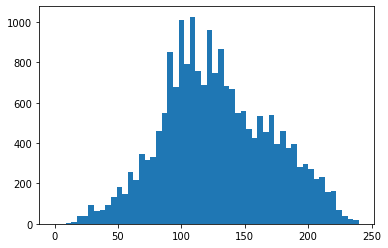


===histogram of 113.5===
min	 7
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 241
range	 234
width	 3.5367291851636433
# bins	 67


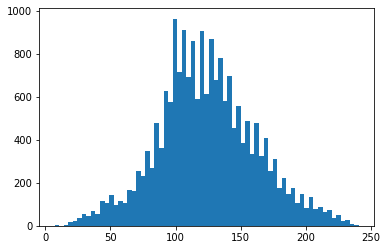


===histogram of 110.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


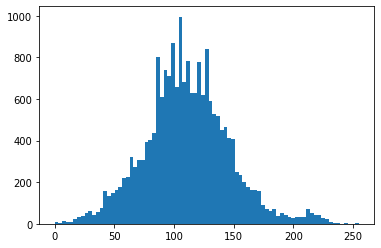


===histogram of 187.1===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


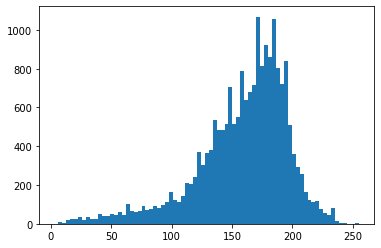


===histogram of 112.3===
min	 0
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 255
width	 4.420911481454554
# bins	 58


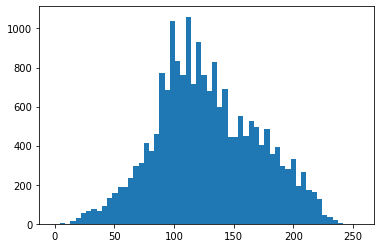


===histogram of 122.6===
min	 3
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


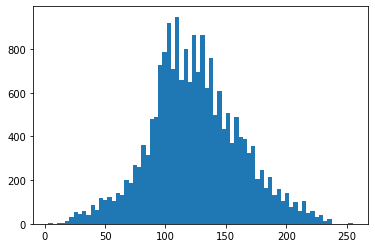


===histogram of 113.6===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


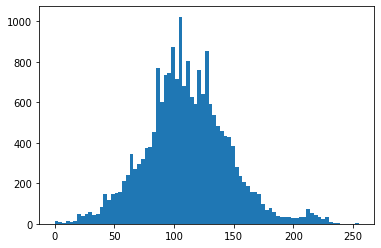


===histogram of 192.2===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


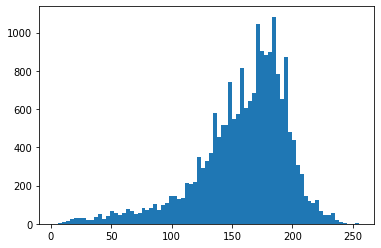


===histogram of 100.2===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


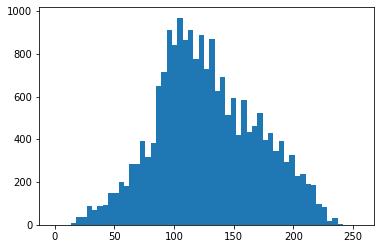


===histogram of 111.5===
min	 10
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 245
width	 3.5367291851636433
# bins	 70


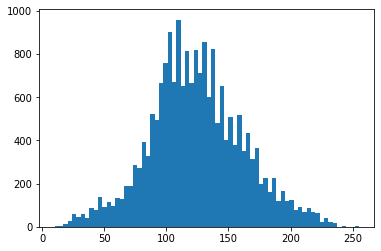


===histogram of 90.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


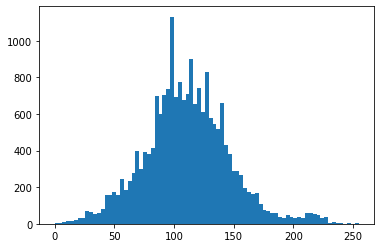


===histogram of 187.2===
min	 4
25.0%	 141.0
75.0%	 185.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 251
width	 3.242001753066673
# bins	 78


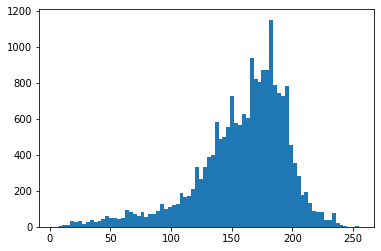


===histogram of 105.8===
min	 6
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 238
width	 4.494593339478797
# bins	 53


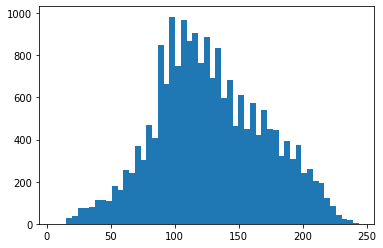


===histogram of 116.3===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 251
width	 3.6104110431878857
# bins	 70


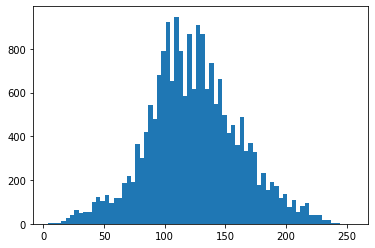


===histogram of 99.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


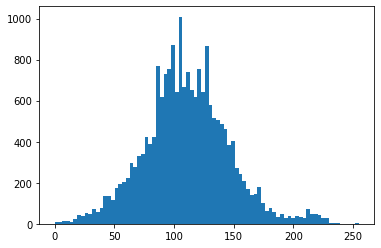


===histogram of 195.2===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 254
width	 3.3156836110909156
# bins	 77


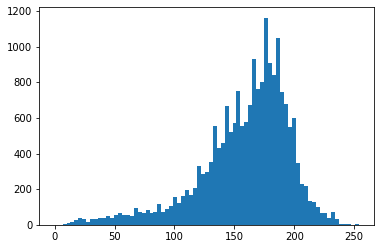


===histogram of 108===
min	 10
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 239
range	 229
width	 4.420911481454554
# bins	 52


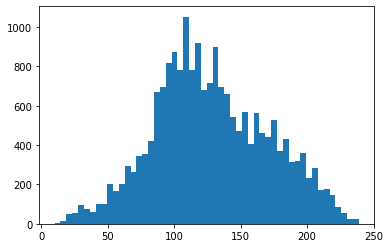


===histogram of 117.4===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 249
range	 247
width	 3.6104110431878857
# bins	 69


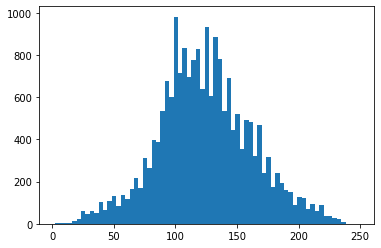


===histogram of 97.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


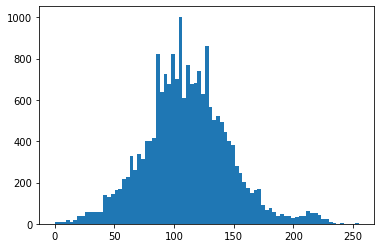


===histogram of 195.3===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 255
width	 3.3156836110909156
# bins	 77


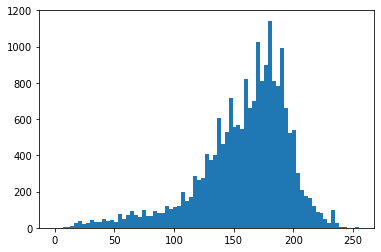


===histogram of 108.1===
min	 15
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 240
width	 4.420911481454554
# bins	 55


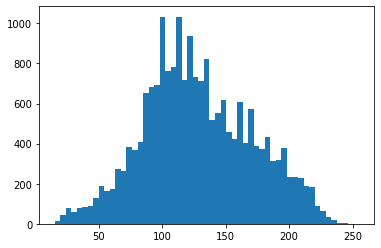


===histogram of 115.3===
min	 5
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 244
width	 3.5367291851636433
# bins	 69


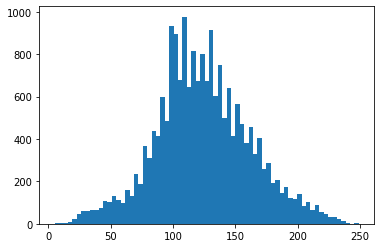


===histogram of 96.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


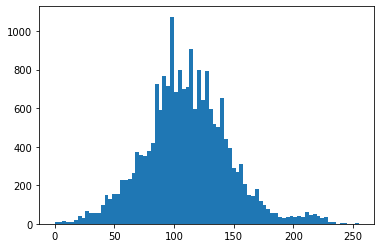


===histogram of 196.1===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 254
width	 3.3156836110909156
# bins	 77


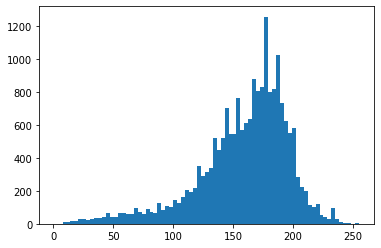


===histogram of 111.6===
min	 3
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 238
width	 4.420911481454554
# bins	 54


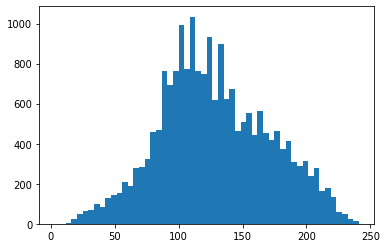


===histogram of 112.4===
min	 2
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


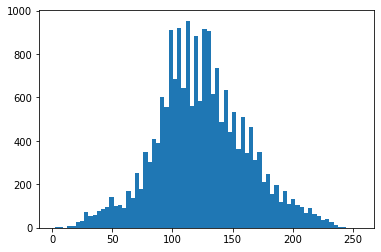


===histogram of 96.2===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 246
range	 246
width	 3.242001753066673
# bins	 76


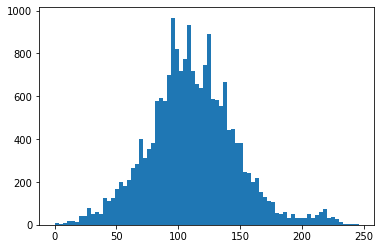


===histogram of 191===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 255
width	 3.3156836110909156
# bins	 77


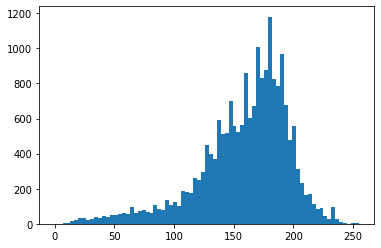


===histogram of 146.1===
min	 14
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 230
width	 4.494593339478797
# bins	 52


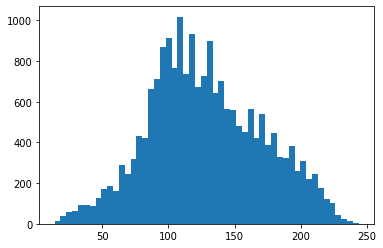


===histogram of 159.1===
min	 2
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


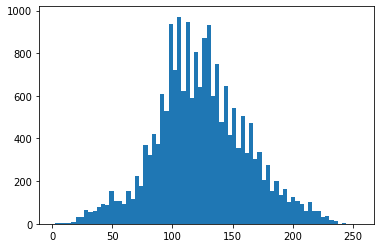


===histogram of 154===
min	 3
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 252
width	 3.1683198950424303
# bins	 80


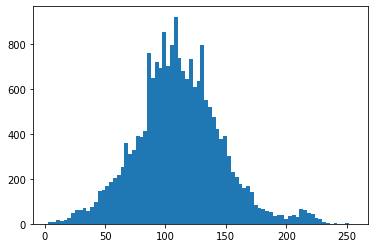


===histogram of 220===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 247
width	 3.3156836110909156
# bins	 75


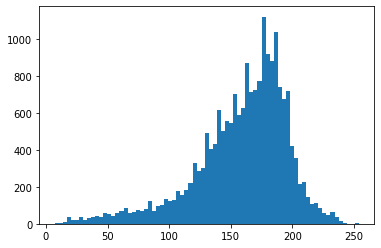


===histogram of 123.3===
min	 4
25.0%	 98.5
75.0%	 159.0
ibqr	 60.5
iqr	 60.5
max	 246
range	 242
width	 4.457752410466675
# bins	 55


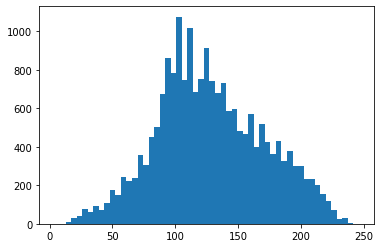


===histogram of 126.4===
min	 0
25.0%	 100.0
75.0%	 147.0
ibqr	 47.0
iqr	 47.0
max	 248
range	 248
width	 3.463047327139401
# bins	 72


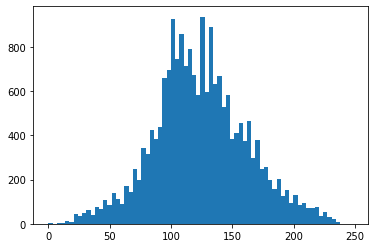


===histogram of 112.5===
min	 0
25.0%	 90.0
75.0%	 132.0
ibqr	 42.0
iqr	 42.0
max	 255
range	 255
width	 3.094638037018188
# bins	 83


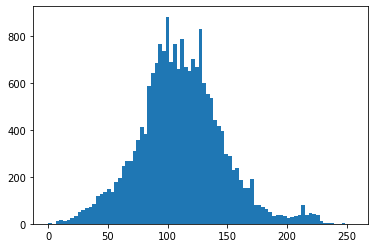


===histogram of 194.2===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


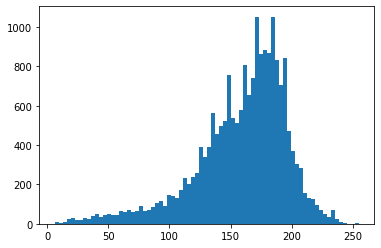


===histogram of 123.4===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 240
range	 240
width	 4.494593339478797
# bins	 54


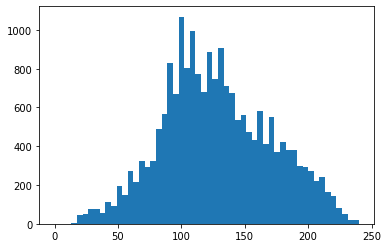


===histogram of 126.5===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


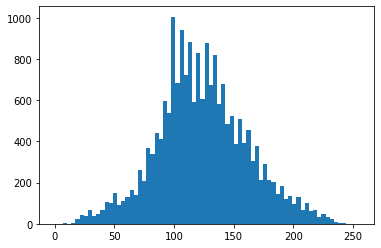


===histogram of 112.6===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


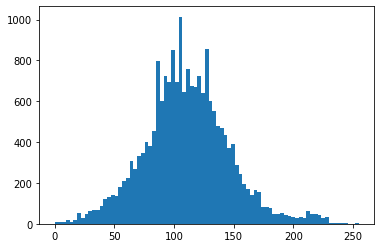


===histogram of 198.2===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


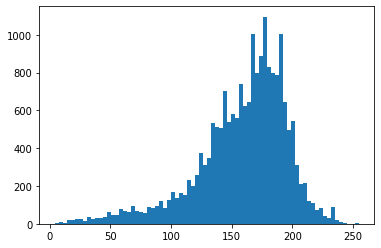


===histogram of 108.2===
min	 11
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 244
width	 4.420911481454554
# bins	 56


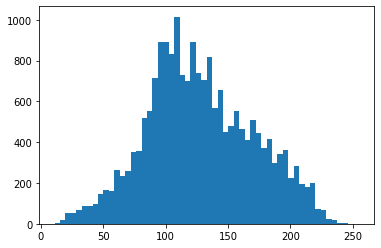


===histogram of 110.3===
min	 7
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 248
width	 3.6104110431878857
# bins	 69


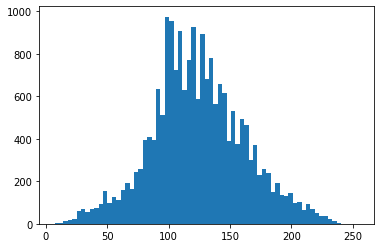


===histogram of 94.5===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


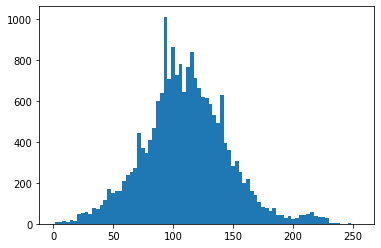


===histogram of 185===
min	 6
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 249
width	 3.242001753066673
# bins	 77


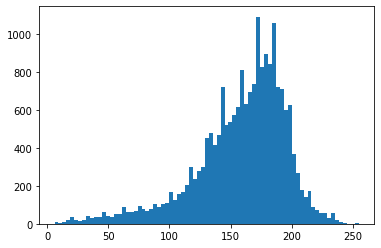


===histogram of 119.4===
min	 12
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 243
width	 4.420911481454554
# bins	 55


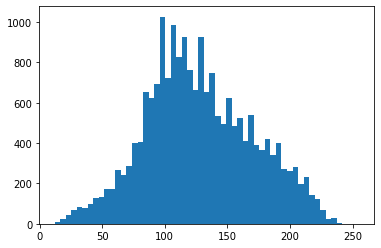


===histogram of 128.1===
min	 11
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 238
width	 3.5367291851636433
# bins	 68


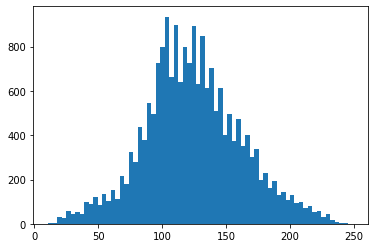


===histogram of 125.5===
min	 2
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 253
width	 3.1683198950424303
# bins	 80


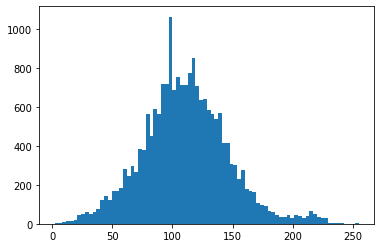


===histogram of 199.4===
min	 5
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 250
width	 3.242001753066673
# bins	 78


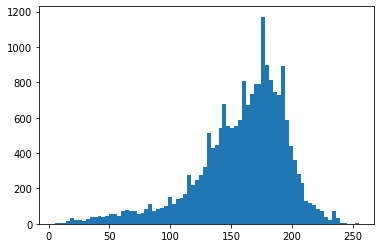


===histogram of 74.2===
min	 4
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 237
width	 4.494593339478797
# bins	 53


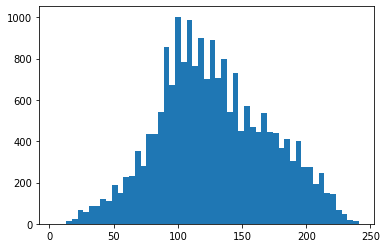


===histogram of 69.5===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 243
range	 239
width	 3.6104110431878857
# bins	 67


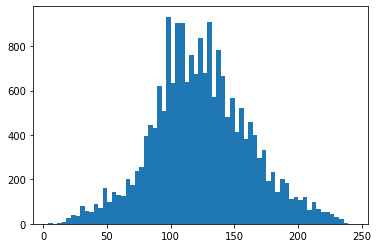


===histogram of 54.3===
min	 1
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 254
width	 3.242001753066673
# bins	 79


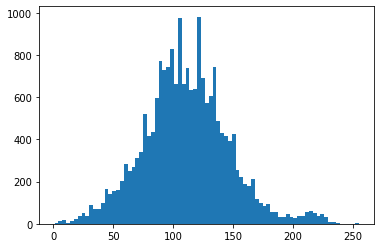


===histogram of 140.2===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


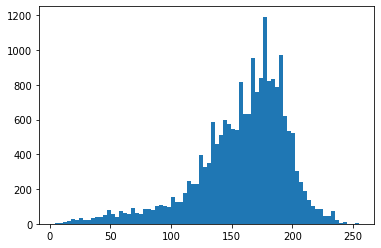


===histogram of 62.3===
min	 7
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 234
width	 4.494593339478797
# bins	 53


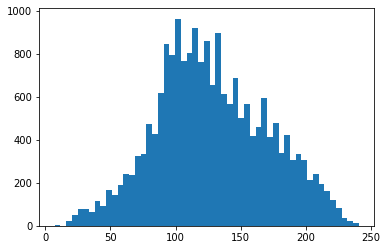


===histogram of 35.1===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 249
range	 246
width	 3.6104110431878857
# bins	 69


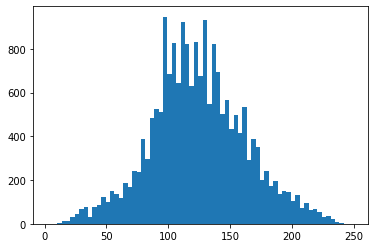


===histogram of 25.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


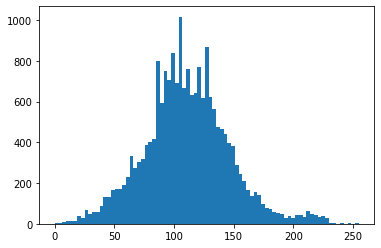


===histogram of 111.7===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 250
width	 3.3156836110909156
# bins	 76


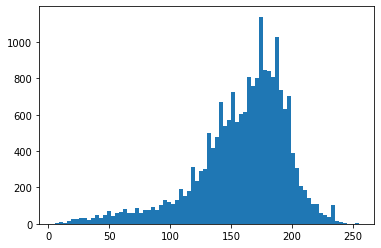


===histogram of 78.1===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 253
width	 4.494593339478797
# bins	 57


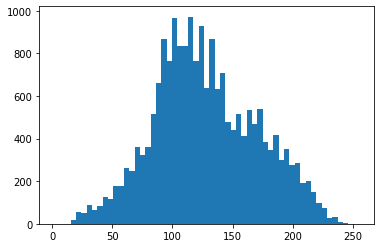


===histogram of 86.2===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


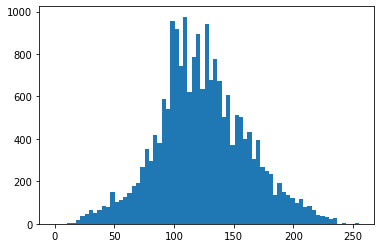


===histogram of 86.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


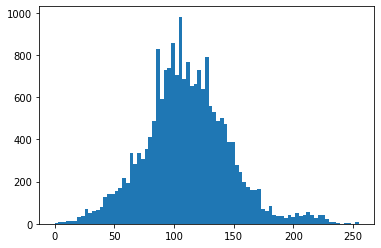


===histogram of 140.3===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 251
width	 3.3156836110909156
# bins	 76


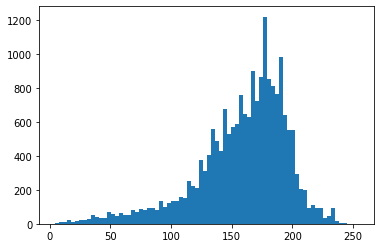


===histogram of 63.3===
min	 8
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 253
range	 245
width	 4.420911481454554
# bins	 56


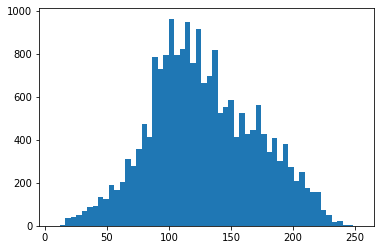


===histogram of 61.1===
min	 7
25.0%	 100.0
75.0%	 147.0
ibqr	 47.0
iqr	 47.0
max	 255
range	 248
width	 3.463047327139401
# bins	 72


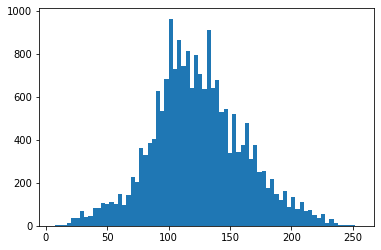


===histogram of 46.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


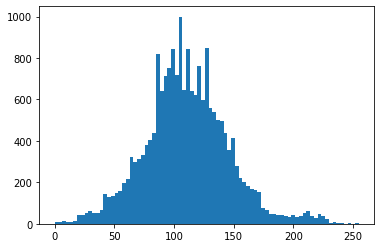


===histogram of 123.5===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 250
range	 250
width	 3.3156836110909156
# bins	 76


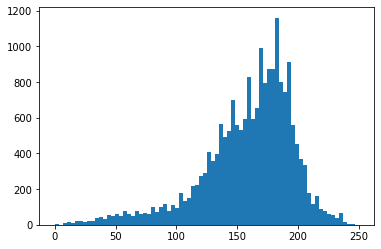


===histogram of 81.2===
min	 8
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 248
range	 240
width	 4.494593339478797
# bins	 54


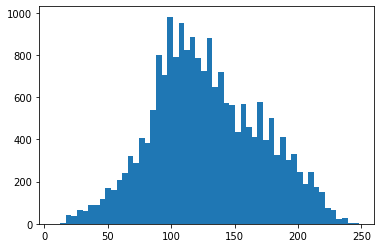


===histogram of 87.3===
min	 7
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 247
range	 240
width	 3.6104110431878857
# bins	 67


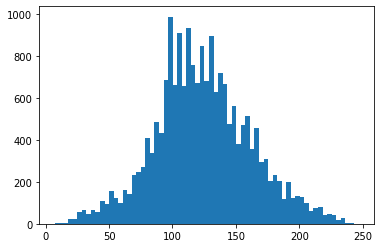


===histogram of 72.1===
min	 2
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 253
width	 3.1683198950424303
# bins	 80


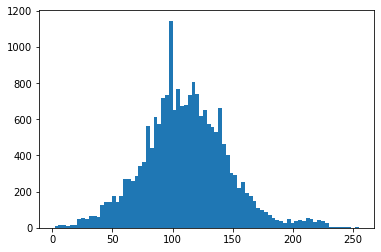


===histogram of 149===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 251
width	 3.3156836110909156
# bins	 76


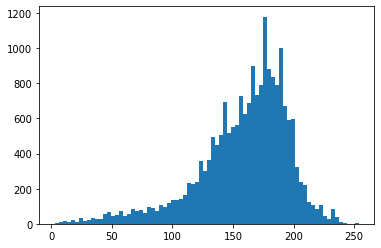


===histogram of 120.6===
min	 9
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 245
range	 236
width	 4.494593339478797
# bins	 53


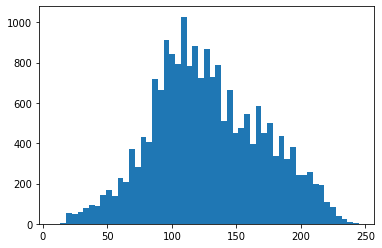


===histogram of 132.1===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


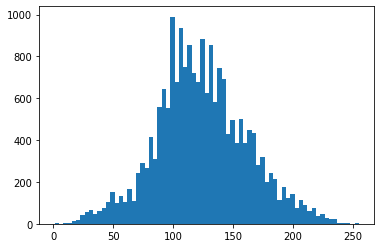


===histogram of 130.2===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


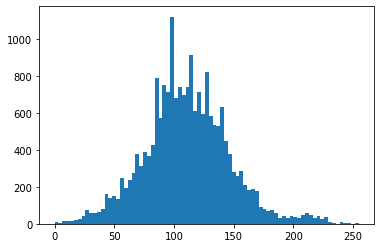


===histogram of 195.4===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 246
range	 242
width	 3.3156836110909156
# bins	 73


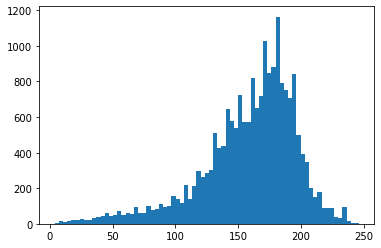


===histogram of 105.9===
min	 12
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 247
range	 235
width	 4.494593339478797
# bins	 53


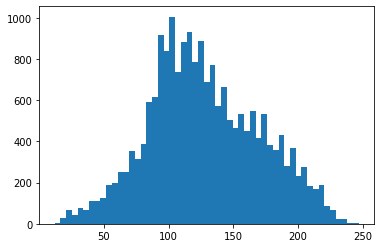


===histogram of 116.4===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 251
width	 3.6104110431878857
# bins	 70


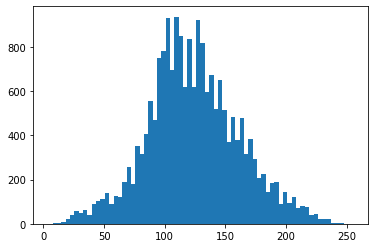


===histogram of 103.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


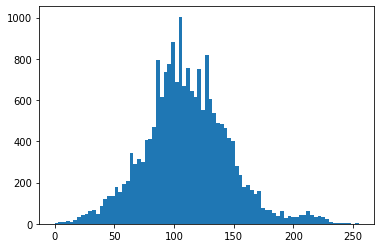


===histogram of 184.1===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 246
width	 3.3156836110909156
# bins	 75


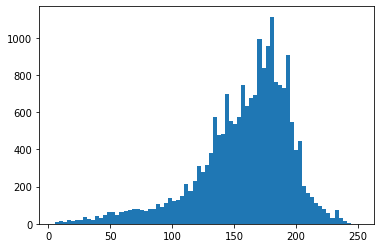


===histogram of 74.3===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 254
width	 4.494593339478797
# bins	 57


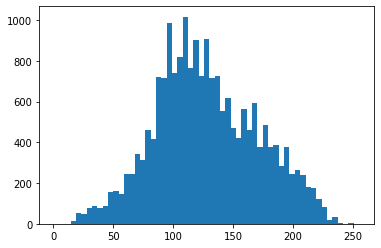


===histogram of 75===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


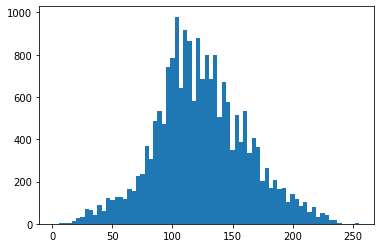


===histogram of 36===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


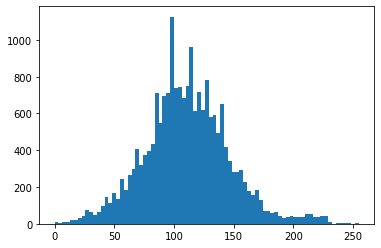


===histogram of 152===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 254
width	 3.3156836110909156
# bins	 77


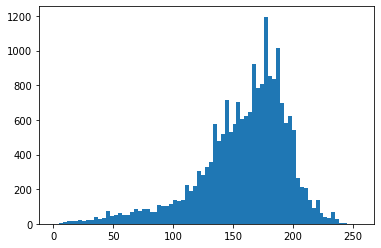


===histogram of 94.6===
min	 13
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 249
range	 236
width	 4.494593339478797
# bins	 53


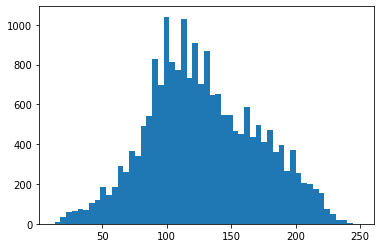


===histogram of 106.5===
min	 5
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 250
width	 3.6104110431878857
# bins	 70


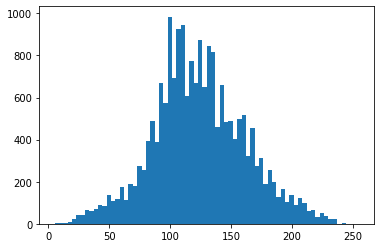


===histogram of 87.4===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


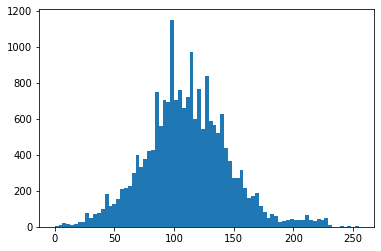


===histogram of 180.2===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 249
range	 246
width	 3.3156836110909156
# bins	 75


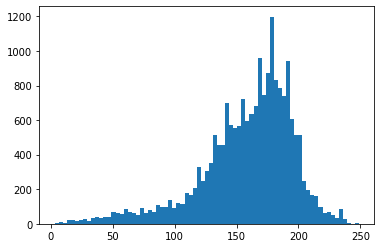


===histogram of 89===
min	 5
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 247
range	 242
width	 4.494593339478797
# bins	 54


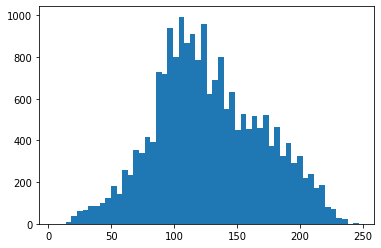


===histogram of 98.7===
min	 0
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


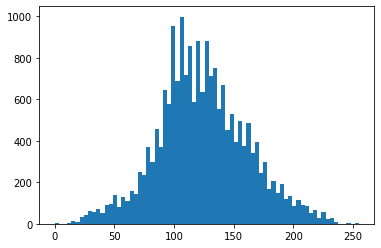


===histogram of 62.4===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


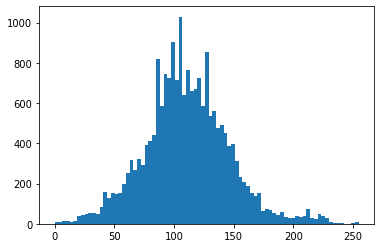


===histogram of 169===
min	 0
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 254
range	 254
width	 3.242001753066673
# bins	 79


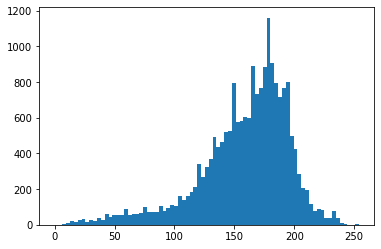


===histogram of 119.5===
min	 14
25.0%	 99.0
75.0%	 158.0
ibqr	 59.0
iqr	 59.0
max	 247
range	 233
width	 4.347229623430311
# bins	 54


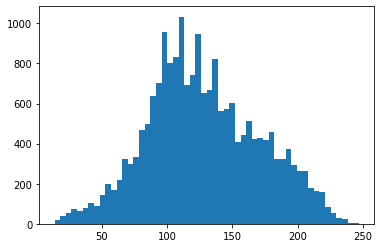


===histogram of 137===
min	 2
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


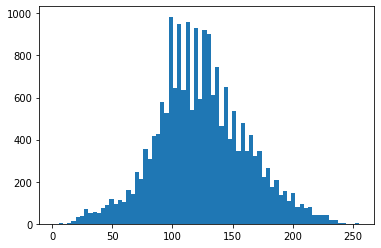


===histogram of 121.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


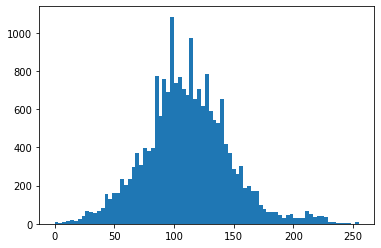


===histogram of 195.5===
min	 4
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 252
range	 248
width	 3.3156836110909156
# bins	 75


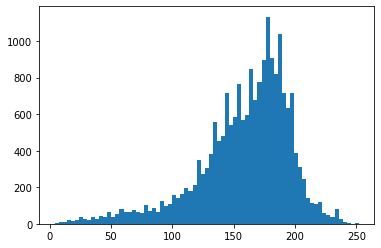


===histogram of 83===
min	 16
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 239
width	 4.494593339478797
# bins	 54


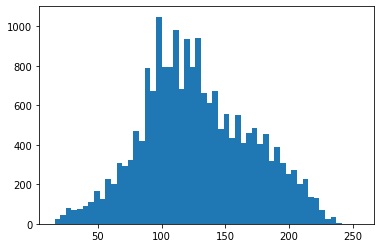


===histogram of 91.1===
min	 3
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


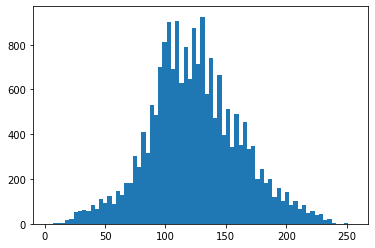


===histogram of 57.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


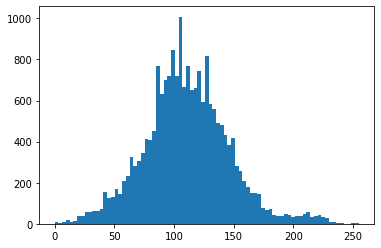


===histogram of 151===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 250
width	 3.3156836110909156
# bins	 76


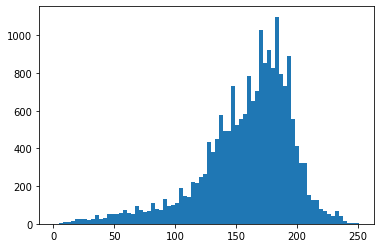


===histogram of 80.1===
min	 6
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 251
range	 245
width	 4.494593339478797
# bins	 55


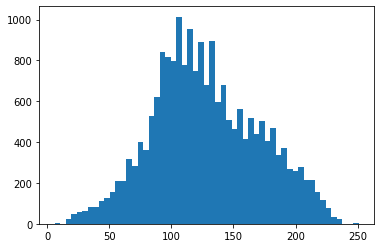


===histogram of 87.5===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


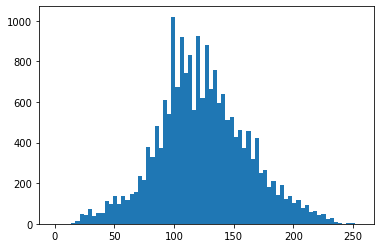


===histogram of 67.4===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


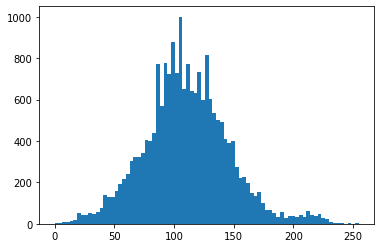


===histogram of 140.4===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 251
range	 250
width	 3.3156836110909156
# bins	 76


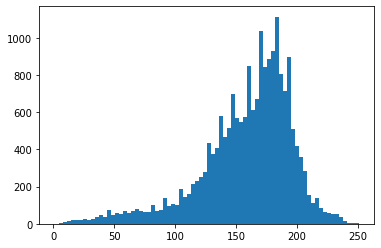


===histogram of 77.2===
min	 13
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 228
width	 4.494593339478797
# bins	 51


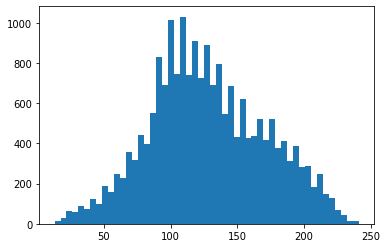


===histogram of 85.2===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 242
range	 239
width	 3.6104110431878857
# bins	 67


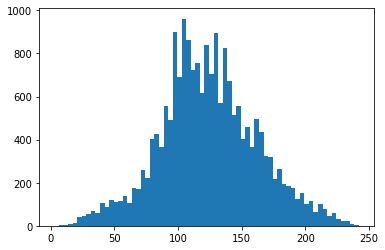


===histogram of 81.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


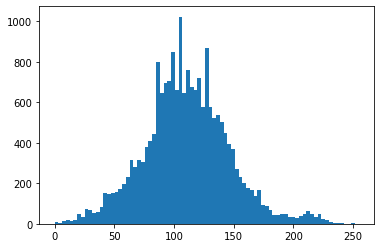


===histogram of 139.2===
min	 6
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 253
range	 247
width	 3.242001753066673
# bins	 77


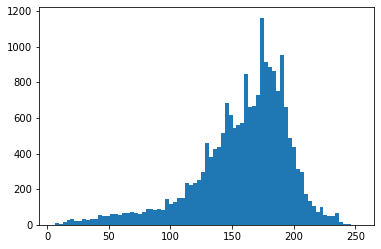


===histogram of 79.1===
min	 2
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 250
range	 248
width	 4.494593339478797
# bins	 56


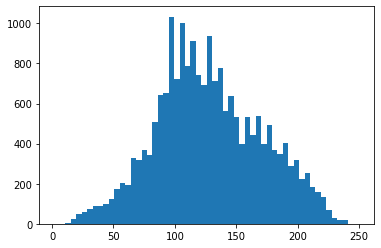


===histogram of 83.1===
min	 8
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 247
width	 3.5367291851636433
# bins	 70


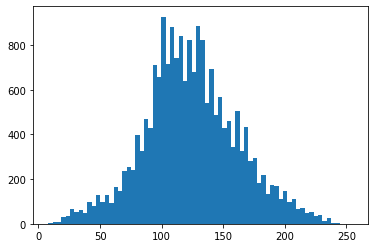


===histogram of 67.5===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


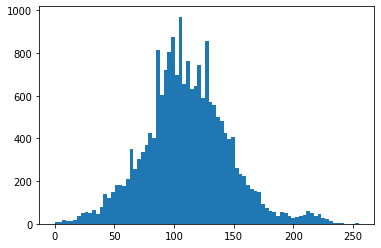


===histogram of 147===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 255
width	 3.3156836110909156
# bins	 77


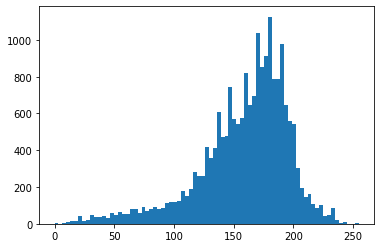


===histogram of 113.7===
min	 14
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 242
range	 228
width	 4.420911481454554
# bins	 52


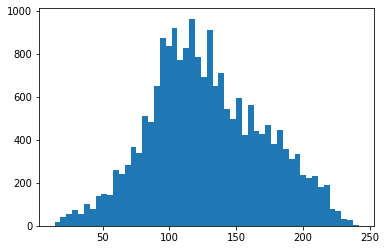


===histogram of 124.2===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 247
width	 3.5367291851636433
# bins	 70


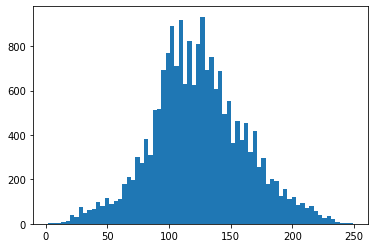


===histogram of 124.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


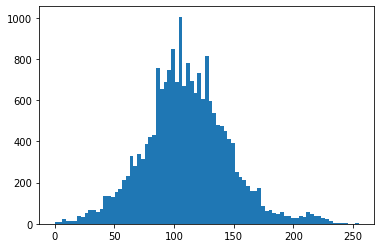


===histogram of 190.1===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


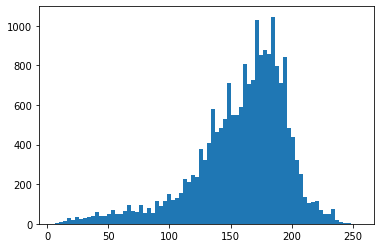


===histogram of 93===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 243
range	 242
width	 4.494593339478797
# bins	 54


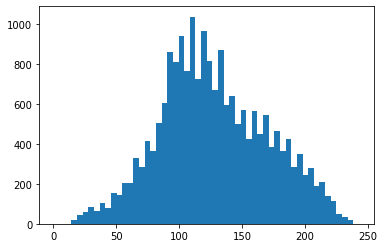


===histogram of 98.8===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 243
range	 241
width	 3.5367291851636433
# bins	 69


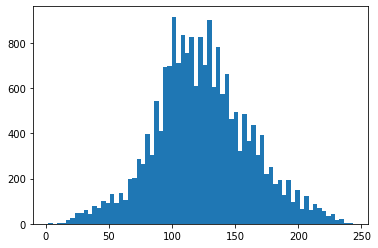


===histogram of 87.6===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 252
range	 252
width	 3.1683198950424303
# bins	 80


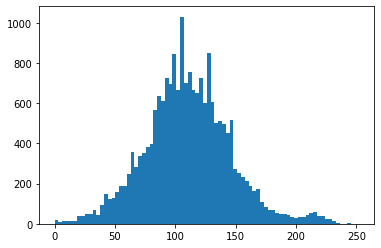


===histogram of 174===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 254
range	 252
width	 3.3156836110909156
# bins	 77


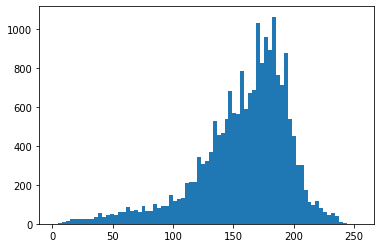


===histogram of 104.3===
min	 0
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 243
width	 4.420911481454554
# bins	 55


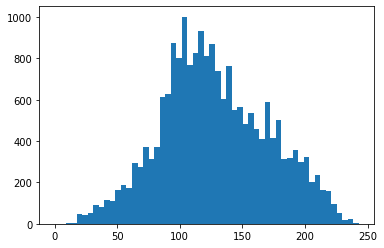


===histogram of 113.8===
min	 3
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 246
range	 243
width	 3.5367291851636433
# bins	 69


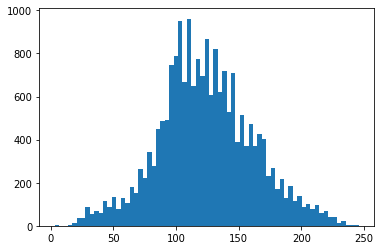


===histogram of 101.3===
min	 0
25.0%	 90.0
75.0%	 133.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


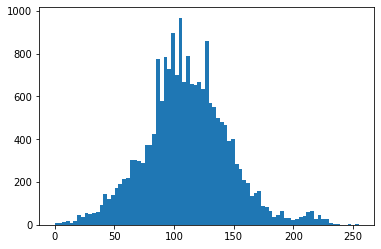


===histogram of 191.1===
min	 8
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 247
width	 3.3156836110909156
# bins	 75


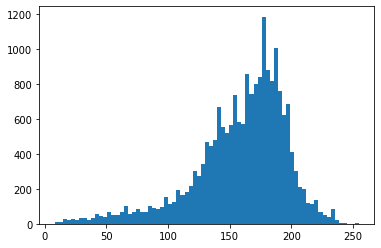


===histogram of 94.7===
min	 11
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 243
range	 232
width	 4.420911481454554
# bins	 53


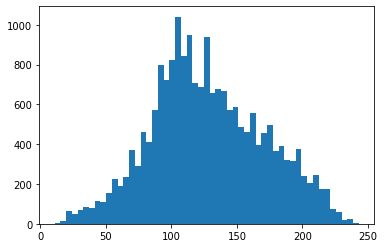


===histogram of 104.4===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 246
range	 242
width	 3.6104110431878857
# bins	 68


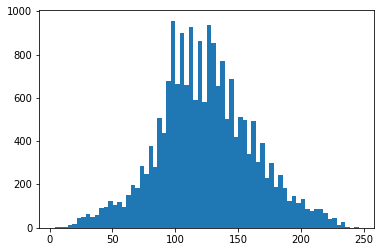


===histogram of 85.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


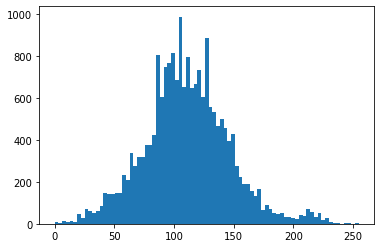


===histogram of 184.2===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 252
width	 3.3156836110909156
# bins	 77


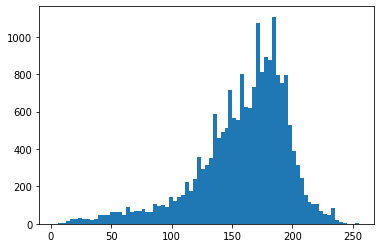


===histogram of 104.5===
min	 10
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 241
range	 231
width	 4.420911481454554
# bins	 53


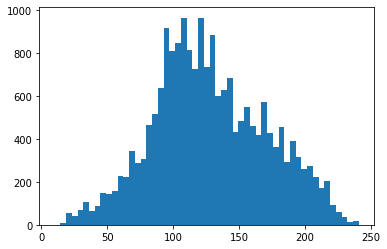


===histogram of 112.7===
min	 3
25.0%	 100.0
75.0%	 147.0
ibqr	 47.0
iqr	 47.0
max	 255
range	 252
width	 3.463047327139401
# bins	 73


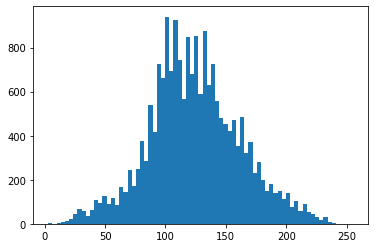


===histogram of 93.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


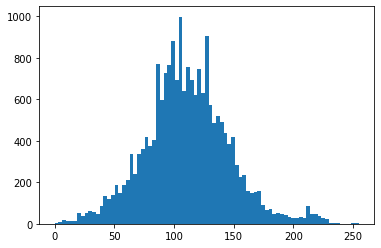


===histogram of 195.6===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 255
width	 3.3156836110909156
# bins	 77


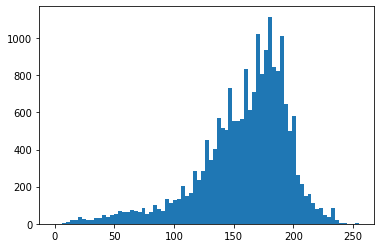


===histogram of 109.2===
min	 8
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 238
range	 230
width	 4.494593339478797
# bins	 52


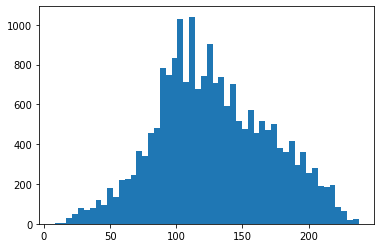


===histogram of 120.7===
min	 5
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 237
range	 232
width	 3.6104110431878857
# bins	 65


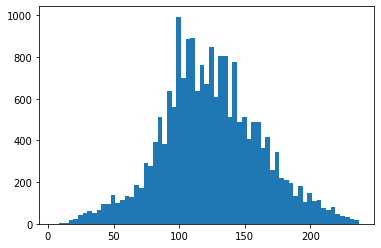


===histogram of 103.4===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 252
range	 252
width	 3.242001753066673
# bins	 78


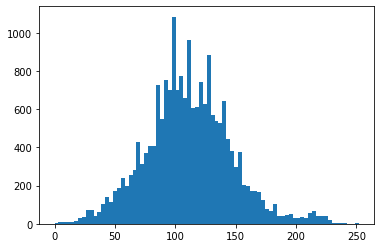


===histogram of 197.2===
min	 2
25.0%	 141.0
75.0%	 185.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 253
width	 3.242001753066673
# bins	 79


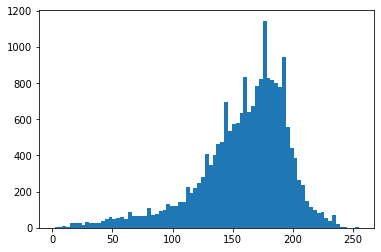


===histogram of 112.8===
min	 10
25.0%	 99.0
75.0%	 158.5
ibqr	 59.5
iqr	 59.5
max	 249
range	 239
width	 4.384070552442433
# bins	 55


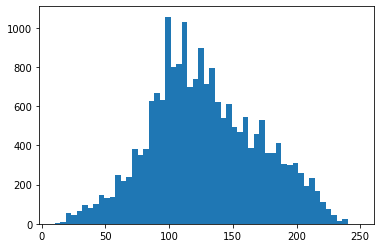


===histogram of 117.5===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 252
range	 250
width	 3.6104110431878857
# bins	 70


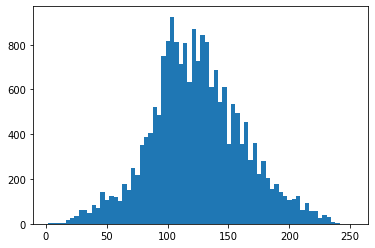


===histogram of 98.9===
min	 1
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 254
width	 3.242001753066673
# bins	 79


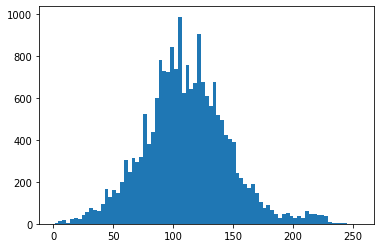


===histogram of 194.3===
min	 2
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 254
range	 252
width	 3.242001753066673
# bins	 78


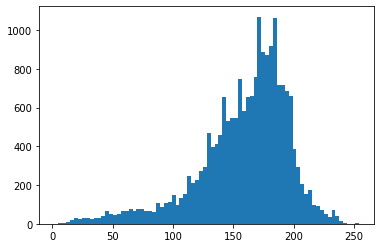


===histogram of 119.6===
min	 15
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 240
width	 4.420911481454554
# bins	 55


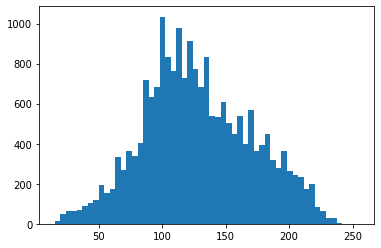


===histogram of 123.6===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 252
width	 3.6104110431878857
# bins	 70


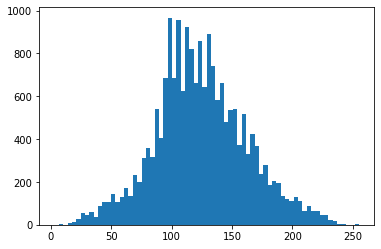


===histogram of 109.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


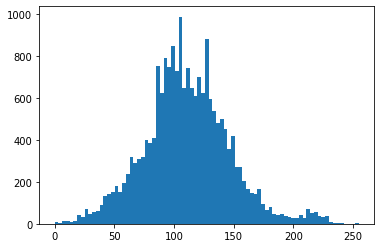


===histogram of 196.2===
min	 7
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 248
width	 3.3156836110909156
# bins	 75


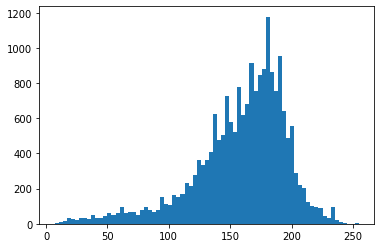


===histogram of 101.4===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 244
width	 4.494593339478797
# bins	 55


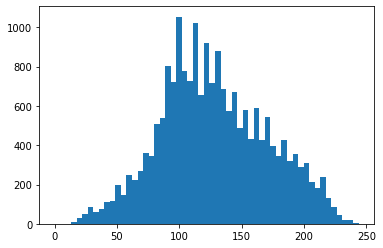


===histogram of 97.2===
min	 4
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 251
width	 3.6104110431878857
# bins	 70


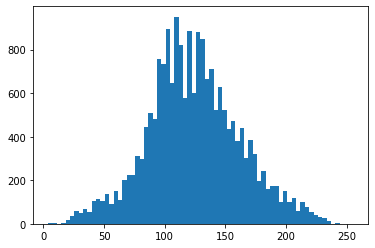


===histogram of 67.6===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


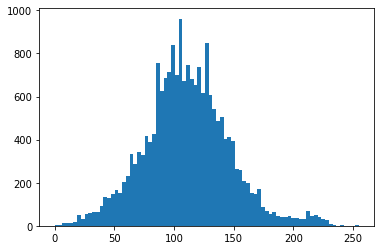


===histogram of 174.1===
min	 5
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 250
width	 3.3156836110909156
# bins	 76


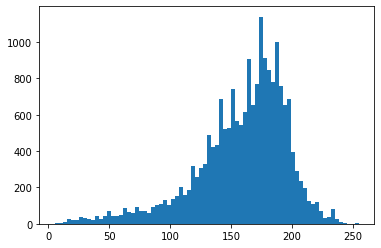


===histogram of 128.2===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


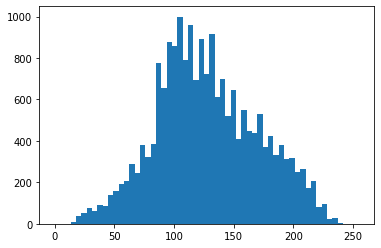


===histogram of 134.1===
min	 3
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 252
width	 3.5367291851636433
# bins	 72


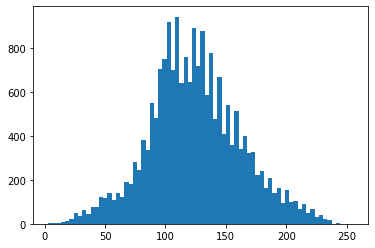


===histogram of 120.8===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


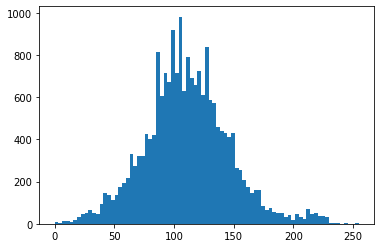


===histogram of 202.2===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


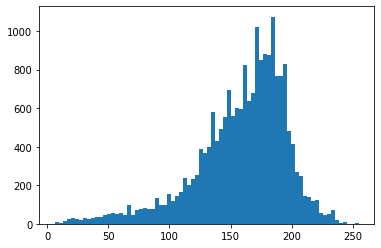


===histogram of 140.5===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


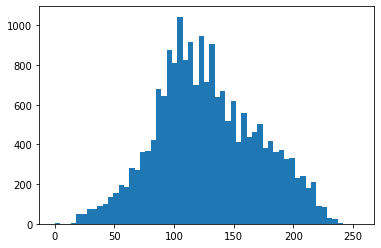


===histogram of 144.2===
min	 2
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


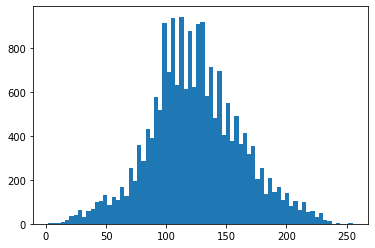


===histogram of 135.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


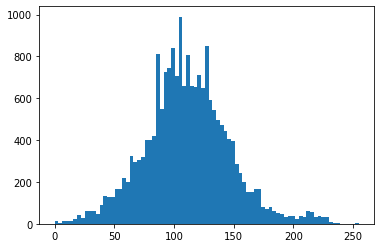


===histogram of 209===
min	 6
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 249
width	 3.3156836110909156
# bins	 76


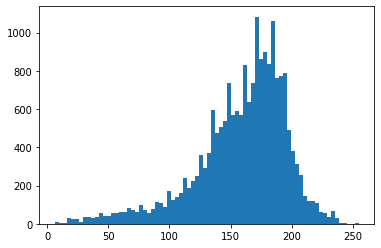


===histogram of 106.6===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 241
width	 4.494593339478797
# bins	 54


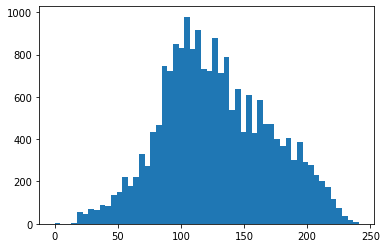


===histogram of 105.10===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 252
range	 250
width	 3.6104110431878857
# bins	 70


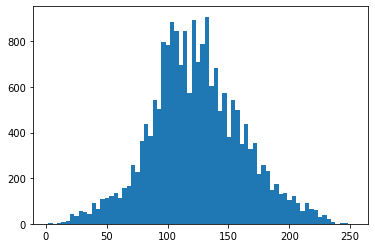


===histogram of 84===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


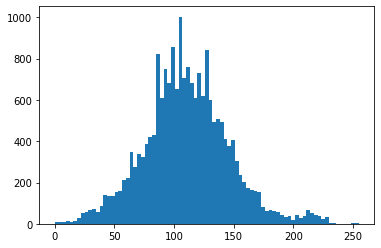


===histogram of 178.2===
min	 5
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 250
width	 3.242001753066673
# bins	 78


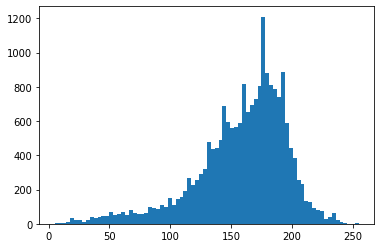


===histogram of 105.11===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 255
width	 4.494593339478797
# bins	 57


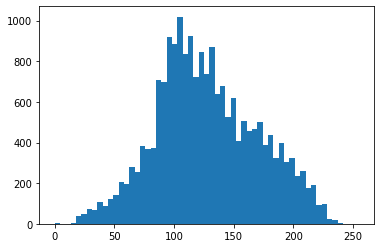


===histogram of 112.9===
min	 2
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 253
width	 3.6104110431878857
# bins	 71


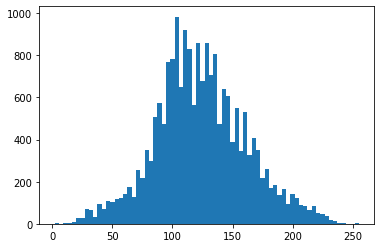


===histogram of 106.7===
min	 1
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 254
width	 3.1683198950424303
# bins	 81


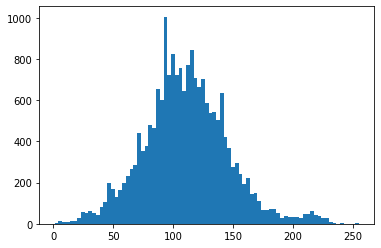


===histogram of 191.2===
min	 5
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 250
width	 3.242001753066673
# bins	 78


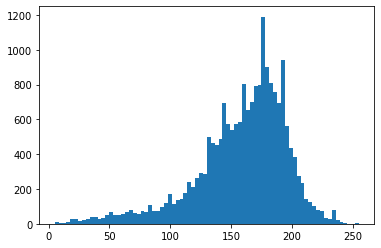


===histogram of 95.3===
min	 3
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 238
width	 4.494593339478797
# bins	 53


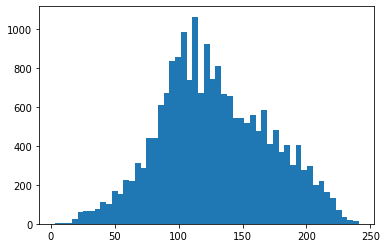


===histogram of 96.3===
min	 3
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 249
range	 246
width	 3.6104110431878857
# bins	 69


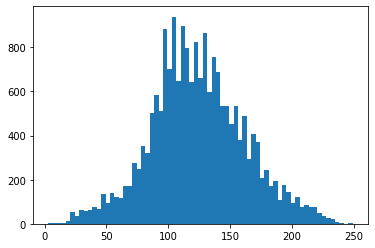


===histogram of 84.1===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


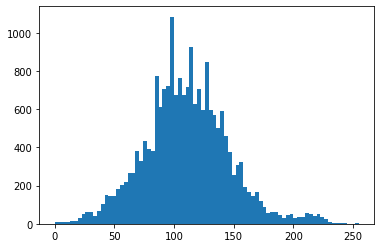


===histogram of 168===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 253
width	 3.3156836110909156
# bins	 77


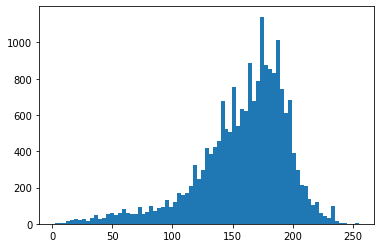


===histogram of 96.4===
min	 3
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 244
range	 241
width	 4.494593339478797
# bins	 54


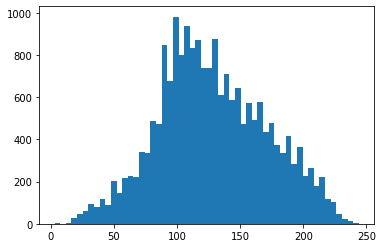


===histogram of 90.2===
min	 2
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 253
width	 3.5367291851636433
# bins	 72


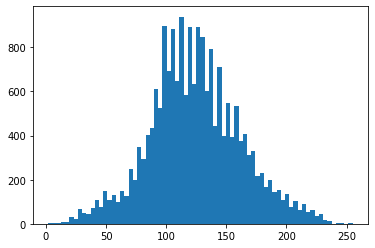


===histogram of 77.3===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


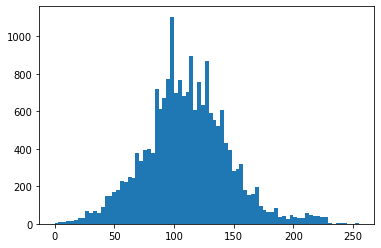


===histogram of 160===
min	 2
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 253
width	 3.3156836110909156
# bins	 77


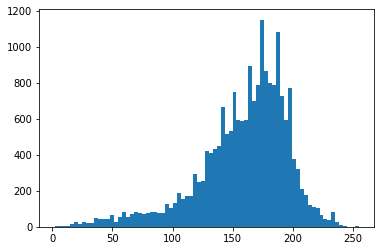


===histogram of 58.2===
min	 4
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 254
range	 250
width	 4.494593339478797
# bins	 56


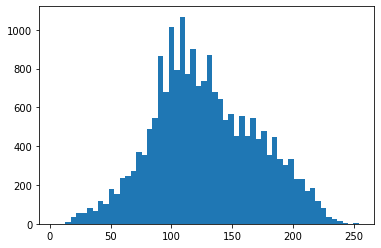


===histogram of 62.5===
min	 6
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 249
width	 3.6104110431878857
# bins	 69


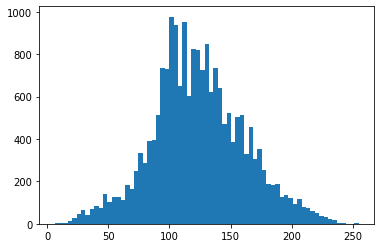


===histogram of 59===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


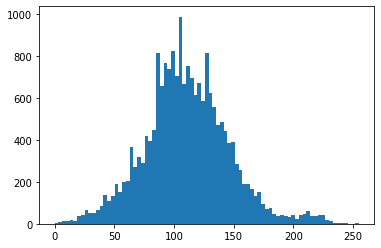


===histogram of 114.3===
min	 2
25.0%	 139.0
75.0%	 185.0
ibqr	 46.0
iqr	 46.0
max	 249
range	 247
width	 3.389365469115158
# bins	 73


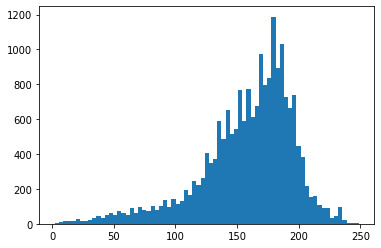


===histogram of 88.4===
min	 14
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 252
range	 238
width	 4.494593339478797
# bins	 53


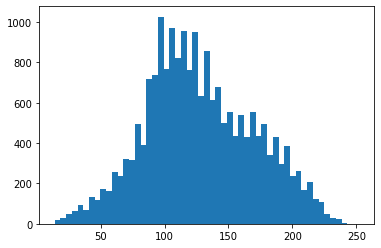


===histogram of 93.2===
min	 2
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 250
range	 248
width	 3.5367291851636433
# bins	 71


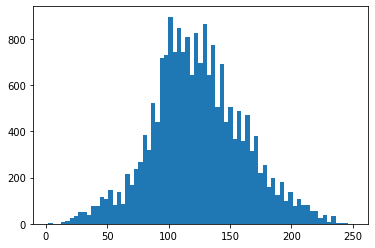


===histogram of 90.3===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


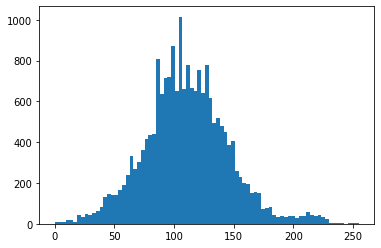


===histogram of 150.1===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 247
range	 247
width	 3.3156836110909156
# bins	 75


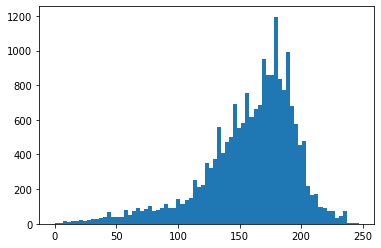


===histogram of 93.3===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 249
range	 249
width	 4.494593339478797
# bins	 56


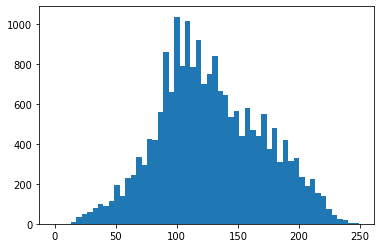


===histogram of 98.10===
min	 1
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 254
width	 3.6104110431878857
# bins	 71


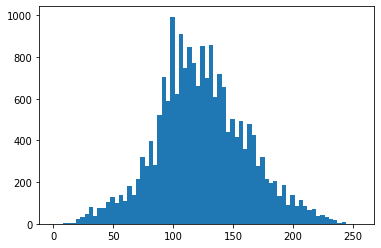


===histogram of 91.2===
min	 0
25.0%	 89.0
75.0%	 133.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 255
width	 3.242001753066673
# bins	 79


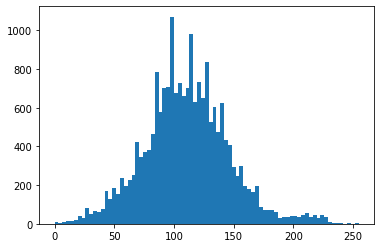


===histogram of 163===
min	 1
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 255
range	 254
width	 3.3156836110909156
# bins	 77


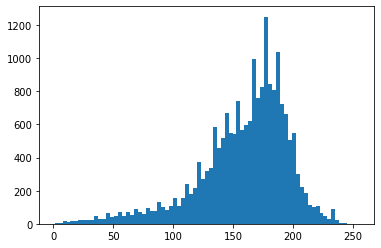


===histogram of 102.2===
min	 1
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 239
range	 238
width	 4.494593339478797
# bins	 53


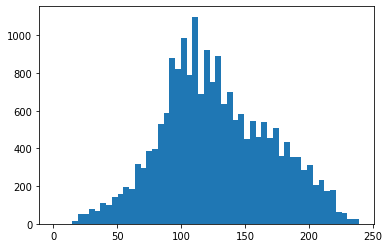


===histogram of 116.5===
min	 1
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 254
width	 3.5367291851636433
# bins	 72


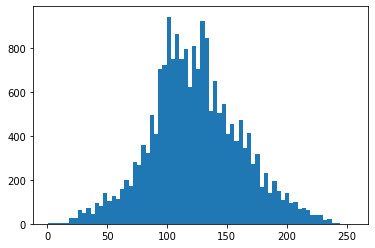


===histogram of 105.12===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


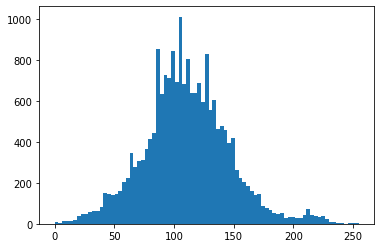


===histogram of 177===
min	 4
25.0%	 139.0
75.0%	 184.0
ibqr	 45.0
iqr	 45.0
max	 247
range	 243
width	 3.3156836110909156
# bins	 74


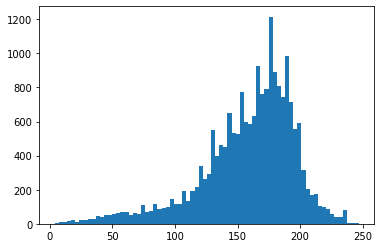


===histogram of 91.3===
min	 9
25.0%	 98.0
75.0%	 158.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 246
width	 4.420911481454554
# bins	 56


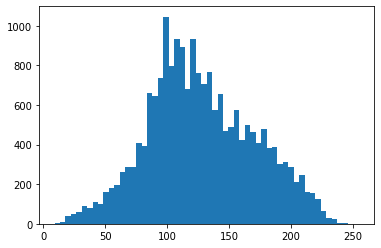


===histogram of 99.4===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


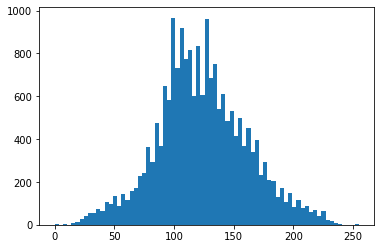


===histogram of 82===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


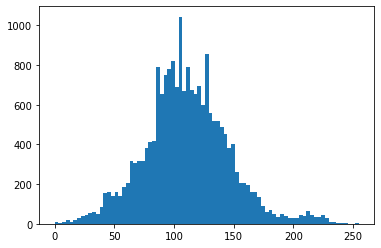


===histogram of 164===
min	 5
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 247
range	 242
width	 3.242001753066673
# bins	 75


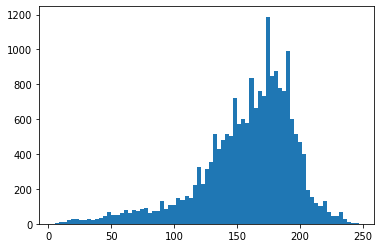


===histogram of 94.8===
min	 16
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 239
width	 4.494593339478797
# bins	 54


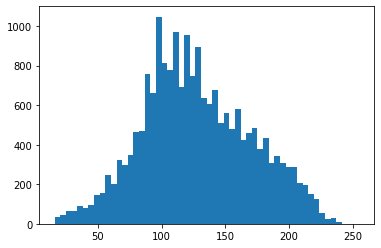


===histogram of 104.6===
min	 0
25.0%	 99.0
75.0%	 147.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 255
width	 3.5367291851636433
# bins	 73


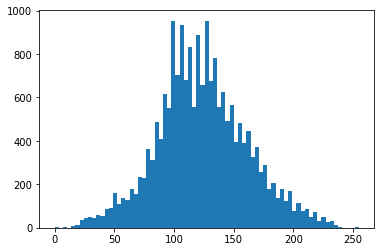


===histogram of 89.1===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


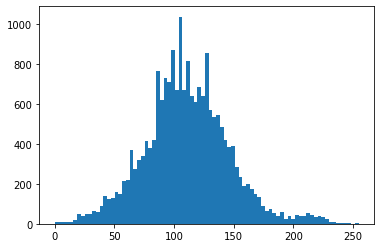


===histogram of 169.1===
min	 3
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 255
range	 252
width	 3.242001753066673
# bins	 78


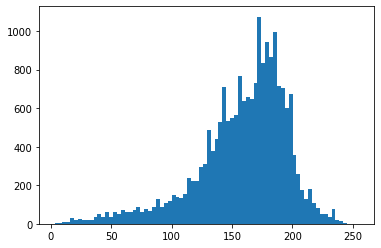


===histogram of 70.3===
min	 13
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 255
range	 242
width	 4.494593339478797
# bins	 54


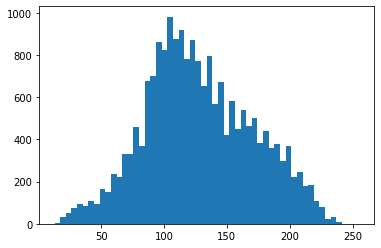


===histogram of 69.6===
min	 0
25.0%	 99.0
75.0%	 148.0
ibqr	 49.0
iqr	 49.0
max	 255
range	 255
width	 3.6104110431878857
# bins	 71


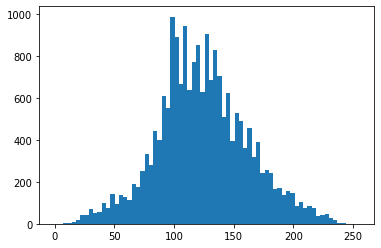


===histogram of 35.2===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


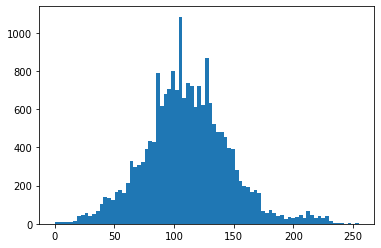


===histogram of 147.1===
min	 3
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 249
range	 246
width	 3.3156836110909156
# bins	 75


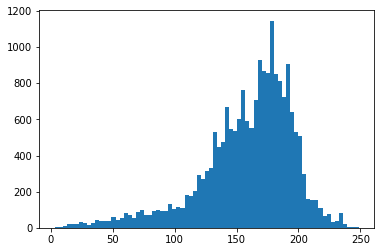


===histogram of 113.9===
min	 14
25.0%	 99.0
75.0%	 159.0
ibqr	 60.0
iqr	 60.0
max	 255
range	 241
width	 4.420911481454554
# bins	 55


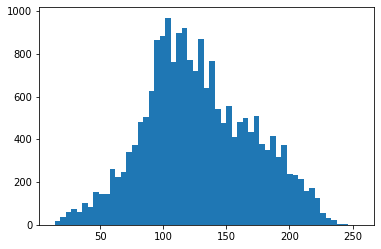


===histogram of 126.6===
min	 7
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 248
width	 3.5367291851636433
# bins	 71


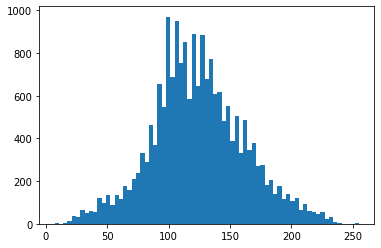


===histogram of 116.6===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


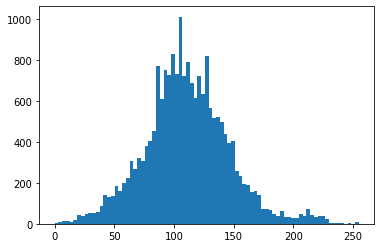


===histogram of 191.3===
min	 1
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 254
range	 253
width	 3.242001753066673
# bins	 79


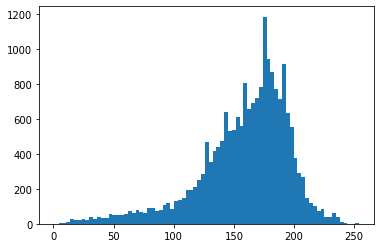


===histogram of 118.2===
min	 15
25.0%	 99.0
75.0%	 158.0
ibqr	 59.0
iqr	 59.0
max	 254
range	 239
width	 4.347229623430311
# bins	 55


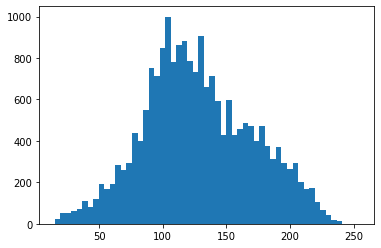


===histogram of 131.4===
min	 5
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 255
range	 250
width	 3.5367291851636433
# bins	 71


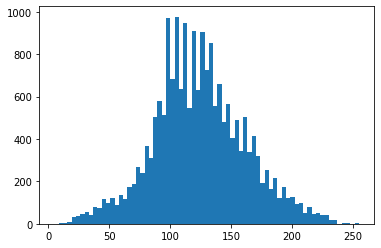


===histogram of 119.7===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


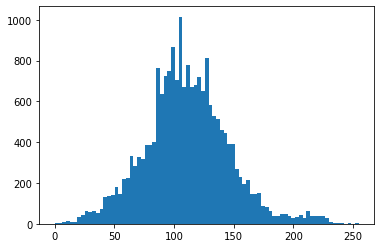


===histogram of 191.4===
min	 4
25.0%	 140.0
75.0%	 184.0
ibqr	 44.0
iqr	 44.0
max	 251
range	 247
width	 3.242001753066673
# bins	 77


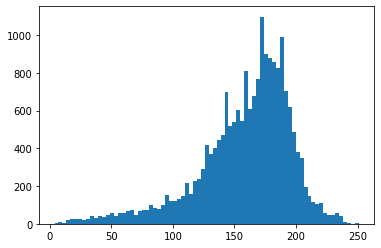


===histogram of 120.9===
min	 9
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 246
range	 237
width	 4.494593339478797
# bins	 53


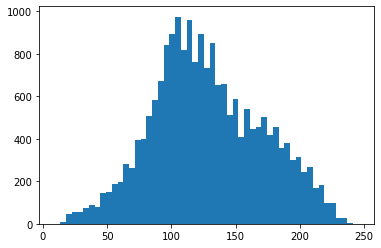


===histogram of 140.6===
min	 4
25.0%	 100.0
75.0%	 148.0
ibqr	 48.0
iqr	 48.0
max	 249
range	 245
width	 3.5367291851636433
# bins	 70


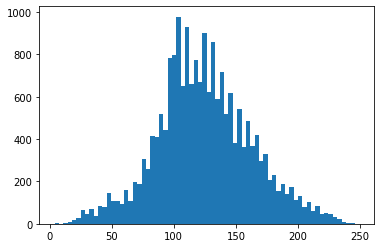


===histogram of 131.5===
min	 0
25.0%	 89.0
75.0%	 132.0
ibqr	 43.0
iqr	 43.0
max	 255
range	 255
width	 3.1683198950424303
# bins	 81


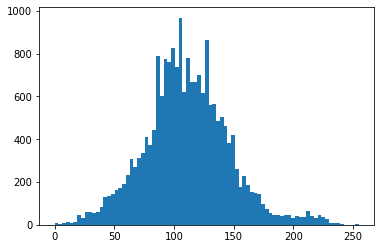


===histogram of 191.5===
min	 0
25.0%	 140.0
75.0%	 185.0
ibqr	 45.0
iqr	 45.0
max	 247
range	 247
width	 3.3156836110909156
# bins	 75


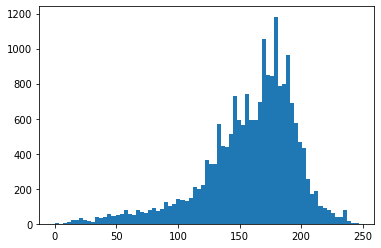


===histogram of 68.3===
min	 0
25.0%	 98.0
75.0%	 159.0
ibqr	 61.0
iqr	 61.0
max	 241
range	 241
width	 4.494593339478797
# bins	 54


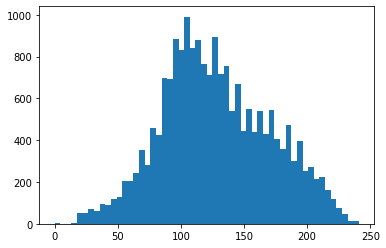

In [ ]:
def ibqr(vector):
    r'''
     Finds the smallest nonzero inter-binary quantile range (ibqr)
     containing the interquartile range.
     @param vector = of which to find the smallest nonzero quantile
     @return (lq, uq, p) = the lower quantile, the upper quantile, the
        proportion of the data lower than the the lower quantile
     '''
    # initialize lq = uq = 0 to start the loop
    lq = 0
    uq = 0
    # proportion of the data lower than the the lower quantile
    # initialize to 0.5, which will be halved
    p = 0.5
    while (lq == uq):
        # halve the proportion
        p = p/2
        # find the quantiles for (p), (1 - p)
        lq, uq = (vector.quantile(q=q) for q in (p, (1 - p)))
    # end while (iqr == 0)
    return (lq, uq, p)
# end def ibqr(vector)

# loop through the features (all numerical)
for column in df_train.columns:
    # find the range
    min_val = df_train[column].min()
    max_val = df_train[column].max()
    range_val = max_val - min_val
    # find the smallest nonzero inter-binary quantile range
    (lq, uq, p) = ibqr(df_train[column])
    ibqr_val = uq - lq
    # estimate a nonzero interquartile range
    iqr = ibqr_val/(2 - 4*p)
    # calculate the bin width
    # using Freedman–Diaconis' choice
    n = df_train[column].shape[0]
    width = (2 * iqr * (n**(-1/3)))
    # calculate the number of bins
    n_bins = ceil(range_val/width)
    # end if (iqr)
    
    # print the parameters we calculated
    print(fr"===histogram of {column}===")
    print('min\t', min_val)
    print("{}%\t {}".format(100*p, lq))
    print("{}%\t {}".format(100*(1 - p), uq))
    print('ibqr\t', ibqr_val)
    print('iqr\t', ('~' if (ibqr_val != iqr) else ' '), iqr, sep='')
    print('max\t', max_val)
    print('range\t', range_val)
    print('width\t', width)
    print('# bins\t', n_bins)

    # plot for this feature
    plt.hist(df_train[column].values, n_bins)
    # place the plot here
    plt.show()
    print()
# next column

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(r'bias:\t{}'.format(lr.intercept_))
print(r'weights:\t{}'.format(lr.coef_))

bias:\t[0.25037683 0.23082563 0.19187285 0.32692469]
weights:\t[[ 1.88310289e-04  8.76441051e-04 -4.95686281e-04 ...  1.14396931e-03
   2.17969825e-05  4.85382527e-04]
 [ 2.01765019e-04 -1.14309711e-03  3.93450135e-04 ... -4.36356295e-04
  -3.13089206e-04  6.56217496e-04]
 [-1.83960392e-04  6.65777439e-04 -8.57771811e-04 ...  2.06162149e-04
   9.23855644e-05 -3.82213849e-04]
 [-2.06114915e-04 -3.99121378e-04  9.60007957e-04 ... -9.13775162e-04
   1.98906659e-04 -7.59386174e-04]]
